In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from random import randint
import time
import numpy as np
import json

import getpass
import random
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
billboard=requests.get('https://www.billboard.com/charts/hot-100?rank=1')

In [3]:
billboard_song=BeautifulSoup(billboard.text,'html.parser')

In [4]:
billboard_lists=billboard_song.find_all('button',class_='chart-element__wrapper display--flex flex--grow sort--default')

In [5]:
bill_num=[]
bill_name=[]
bill_artist=[]

In [6]:
for song in billboard_lists:
    rank=song.find('span',class_='chart-element__rank__number')
    name=song.find('span',class_='chart-element__information__song text--truncate color--primary')
    artist=song.find('span',class_='chart-element__information__artist text--truncate color--secondary')
    bill_num.append(rank.text)
    bill_name.append(name.text)
    bill_artist.append(artist.text)

In [7]:
billboard_ranking=pd.DataFrame({'Ranking':bill_num,
                  'Song Name':bill_name,
                  'Artist':bill_artist})

In [8]:
billboard_ranking

,Ranking,Song Name,Artist
0,1,Life Goes On,BTS
1,2,Mood,24kGoldn Featuring iann dior
2,3,Dynamite,BTS
3,4,Positions,Ariana Grande
4,5,I Hope,Gabby Barrett Featuring Charlie Puth
...,...,...,...
95,96,Popstar,DJ Khaled Featuring Drake
96,97,Bichota,Karol G
97,98,Happy Does,Kenny Chesney
98,99,Cover Me Up,Morgan Wallen


In [9]:
mtv=requests.get('http://www.mtv.de/charts/c6mc86/single-top-100')

In [10]:
mtv.status_code

200

In [11]:
mtv_single_top100=BeautifulSoup(mtv.text,'html.parser')

In [12]:
mtv_lists=mtv_single_top100.find_all('div',class_='chartItemsBox')

In [13]:
mtv_num=[]
mtv_name=[]
mtv_artist=[]

In [14]:
for song in mtv_lists:
    number=song.find('div',class_='currentPos')
    name=song.find('div',class_='videoTitle')
    artist=song.find('span')
    mtv_num.append(number.text)
    mtv_name.append(name.text)
    mtv_artist.append(artist)

In [15]:
mtv_artist

[<span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span>LUNA</span>,
 <span>Master KG</span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 None,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>,
 None,
 <span class="icon-arrow_selector"></span>,
 <span class="icon-arrow_selector"></span>]

In [16]:
mtv_ranking=pd.DataFrame({'Ranking':mtv_num,
                  'Song Name':mtv_name,
                  'Artist':mtv_artist})

In [17]:
wiki=requests.get('https://en.wikipedia.org/wiki/Lists_of_songs')

In [18]:
wiki_song=BeautifulSoup(wiki.text,'html.parser')

In [19]:
wiki_lists=wiki_song.find('div',class_='div-col columns column-width').find_all('li')

In [20]:
song_lists=[]
links=[]

In [21]:
for song in wiki_lists:
    list=song.text
    link=song.a['href']
    song_lists.append(list)
    links.append(link)

In [22]:
links

['/wiki/List_of_songs_recorded_by_Arijit_Singh',
 '/wiki/List_of_songs_recorded_by_2PM',
 '/wiki/List_of_songs_recorded_by_311',
 '/wiki/List_of_songs_recorded_by_4Minute',
 '/wiki/List_of_songs_recorded_by_911',
 '/wiki/List_of_songs_recorded_by_A-Teens',
 '/wiki/List_of_songs_recorded_by_Aaliyah',
 '/wiki/List_of_songs_recorded_by_Adele',
 '/wiki/List_of_songs_recorded_by_Aerosmith',
 '/wiki/List_of_songs_recorded_by_Ariana_Grande',
 '/wiki/List_of_songs_recorded_by_Die_%C3%84rzte',
 '/wiki/List_of_songs_recorded_by_After_School',
 '/wiki/List_of_songs_recorded_by_Christina_Aguilera',
 '/wiki/List_of_songs_recorded_by_AKB48',
 '/wiki/List_of_songs_recorded_by_Fiona_Apple',
 '/wiki/List_of_songs_recorded_by_Arch_Enemy',
 '/wiki/List_of_songs_recorded_by_Arctic_Monkeys',
 '/wiki/List_of_songs_recorded_by_Badlees',
 '/wiki/List_of_songs_recorded_by_Syd_Barrett',
 '/wiki/List_of_songs_recorded_by_the_Beach_Boys',
 '/wiki/List_of_songs_recorded_by_Beady_Eye',
 '/wiki/List_of_songs_recorde

In [23]:
wiki_song=pd.DataFrame({'List Name':song_lists,
                       'Link':links})
wiki_song

,List Name,Link
0,List of songs recorded by Arijit Singh,/wiki/List_of_songs_recorded_by_Arijit_Singh
1,List of songs recorded by 2PM,/wiki/List_of_songs_recorded_by_2PM
2,List of songs recorded by 311,/wiki/List_of_songs_recorded_by_311
3,List of songs recorded by 4Minute,/wiki/List_of_songs_recorded_by_4Minute
4,List of songs recorded by 911,/wiki/List_of_songs_recorded_by_911
...,...,...
292,List of songs recorded by Wolfmother,/wiki/List_of_songs_recorded_by_Wolfmother
293,List of songs recorded by Alka Yagnik,/wiki/List_of_songs_recorded_by_Alka_Yagnik
294,"List of songs recorded by ""Weird Al"" Yankovic",/wiki/List_of_songs_recorded_by_%22Weird_Al%22...
295,List of songs recorded by Zao,/wiki/List_of_songs_recorded_by_Zao


In [24]:
pages=[]

for i in range(1,6):
    start_at=str(i)
    url='https://musicbrainz.org/series/b3484a66-a4de-444d-93d3-c99a73656905?page='+start_at
    response=requests.get(url)
    print('Status code: ' + str(response.status_code))
    pages.append(response)
    
    wait_time = randint(1,3)
    print("I will sleep for " + str(wait_time) + " second/s.")
    time.sleep(wait_time)

Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 1 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 1 second/s.


In [25]:
from lxml import etree

In [26]:
ranking=[]
song_name=[]
song_artist=[]

In [27]:
for i in range(len(pages)):
    tree=etree.HTML(pages[i].text)
    ranking.extend(tree.xpath('//table/tbody//tr/td[1]/text()'))
    song_name.extend(tree.xpath('//tr/td[2]/descendant::a/bdi/text()'))
    song_artist.extend(tree.xpath('//tr/td[3]/descendant::a[1]/bdi/text()'))

In [28]:
musicbrand_ranking=pd.DataFrame({'Ranking':ranking,
                  'Song Name':song_name,
                  'Artist':song_artist})

In [29]:
musicbrand_ranking

,Ranking,Song Name,Artist
0,1,Like a Rolling Stone,Bob Dylan
1,2,(I Can’t Get No) Satisfaction,The Rolling Stones
2,3,Imagine,John Lennon
3,4,What’s Going On,Marvin Gaye
4,5,Respect,Aretha Franklin
...,...,...,...
495,496,Miss You,The Rolling Stones
496,497,Buddy Holly,Weezer
497,498,Rainy Night in Georgia,Brook Benton
498,499,The Boys Are Back In Town,Thin Lizzy


In [30]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import getpass

In [31]:
spotify_id=getpass.getpass()

········


In [32]:
spotify_secret=getpass.getpass()

········


In [48]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=spotify_id,
    client_secret=spotify_secret))

In [34]:
results = sp.search(q='coldplay', market='US',limit=50)
results

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=coldplay&type=track&market=US&offset=0&limit=50',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4gzpq5DPGxSnKTe4SA8HAU'},
       'href': 'https://api.spotify.com/v1/artists/4gzpq5DPGxSnKTe4SA8HAU',
       'id': '4gzpq5DPGxSnKTe4SA8HAU',
       'name': 'Coldplay',
       'type': 'artist',
       'uri': 'spotify:artist:4gzpq5DPGxSnKTe4SA8HAU'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/6ZG5lRT77aJ3btmArcykra'},
     'href': 'https://api.spotify.com/v1/albums/6ZG5lRT77aJ3btmArcykra',
     'id': '6ZG5lRT77aJ3btmArcykra',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b2733d92b2ad5af9fbc8637425f0',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e023d92b2ad5af9fbc8637425f0',
       'width': 300},
      {'height': 64,
       'url': 'https://i.scd

In [35]:
results.keys()

dict_keys(['tracks'])

In [36]:
results['tracks']['href']

'https://api.spotify.com/v1/search?query=coldplay&type=track&market=US&offset=0&limit=50'

In [37]:
results['tracks']['total']

5064

In [38]:
results['tracks']['items'][3].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [39]:
results['tracks']['items'][3]['album']

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/69GGBxA162lTqCwzJG5jLp'},
   'href': 'https://api.spotify.com/v1/artists/69GGBxA162lTqCwzJG5jLp',
   'id': '69GGBxA162lTqCwzJG5jLp',
   'name': 'The Chainsmokers',
   'type': 'artist',
   'uri': 'spotify:artist:69GGBxA162lTqCwzJG5jLp'}],
 'external_urls': {'spotify': 'https://open.spotify.com/album/4JPguzRps3kuWDD5GS6oXr'},
 'href': 'https://api.spotify.com/v1/albums/4JPguzRps3kuWDD5GS6oXr',
 'id': '4JPguzRps3kuWDD5GS6oXr',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b2730c13d3d5a503c84fcc60ae94',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/ab67616d00001e020c13d3d5a503c84fcc60ae94',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67616d000048510c13d3d5a503c84fcc60ae94',
   'width': 64}],
 'name': 'Memories...Do Not Open',
 'release_date': '2017-04-07',
 'release_date_precision': 'day',
 'total_tracks': 12,


In [40]:
artists_lists=['Imaginne Dragons','Radio Slave','Disk Space']

In [41]:
artists_info=[sp.search(q=artists_lists, market='US',limit=50) for artist in artists_lists]
artists_info

[{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Imaginne+Dragons&type=track&market=US&offset=0&limit=50',
   'items': [{'album': {'album_type': 'album',
      'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/53XhwfbYqKCa1cC15pYq2q'},
        'href': 'https://api.spotify.com/v1/artists/53XhwfbYqKCa1cC15pYq2q',
        'id': '53XhwfbYqKCa1cC15pYq2q',
        'name': 'Imagine Dragons',
        'type': 'artist',
        'uri': 'spotify:artist:53XhwfbYqKCa1cC15pYq2q'}],
      'external_urls': {'spotify': 'https://open.spotify.com/album/33pt9HBdGlAbRGBHQgsZsU'},
      'href': 'https://api.spotify.com/v1/albums/33pt9HBdGlAbRGBHQgsZsU',
      'id': '33pt9HBdGlAbRGBHQgsZsU',
      'images': [{'height': 640,
        'url': 'https://i.scdn.co/image/ab67616d0000b2735675e83f707f1d7271e5cf8a',
        'width': 640},
       {'height': 300,
        'url': 'https://i.scdn.co/image/ab67616d00001e025675e83f707f1d7271e5cf8a',
        'width': 300},
       {'height':

In [42]:
artists_info[1]['tracks']['items'][0]['uri']

'spotify:track:0pqnGHJpmpxLKifKRmU6WP'

In [43]:
def get_artists_from_track(track):
    return [artist['name'] for artist in track['artists']]

In [44]:
playlist_id='spotify:user:spotifycharts:playlist:3sjYlmUL6RH74QjdTEHFBl'
results=sp.playlist(playlist_id)

In [45]:
print(json.dumps(results,indent=4))

{
    "collaborative": false,
    "description": "",
    "external_urls": {
        "spotify": "https://open.spotify.com/playlist/3sjYlmUL6RH74QjdTEHFBl"
    },
    "followers": {
        "href": null,
        "total": 1
    },
    "href": "https://api.spotify.com/v1/playlists/3sjYlmUL6RH74QjdTEHFBl?additional_types=track",
    "id": "3sjYlmUL6RH74QjdTEHFBl",
    "images": [
        {
            "height": 640,
            "url": "https://mosaic.scdn.co/640/ab67616d0000b2734e2ee7b90a755bc35449ef46ab67616d0000b2735b290977566d2aaf6eeeb542ab67616d0000b273861b453e5734cc3514162382f660d57b17d40f3267b1aef2a6bb8496ac091688",
            "width": 640
        },
        {
            "height": 300,
            "url": "https://mosaic.scdn.co/300/ab67616d0000b2734e2ee7b90a755bc35449ef46ab67616d0000b2735b290977566d2aaf6eeeb542ab67616d0000b273861b453e5734cc3514162382f660d57b17d40f3267b1aef2a6bb8496ac091688",
            "width": 300
        },
        {
            "height": 60,
            "url": "

In [51]:
playlist=sp.user_playlist(spotify_id,'spotify:playlist:3sjYlmUL6RH74QjdTEHFBl')
songs=playlist['tracks']['items']
ids=[]
for i in range(len(songs)):
    ids.append(songs[i]['track']['id'])
features=sp.audio_features(ids)

In [52]:
df=pd.DataFrame(features)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.678,0.728,11,-8.406,0,0.0359,0.003210,0.466,0.1890,0.1360,121.014,audio_features,3q4gmVrPTMPL8tDrNFFLmu,spotify:track:3q4gmVrPTMPL8tDrNFFLmu,https://api.spotify.com/v1/tracks/3q4gmVrPTMPL...,https://api.spotify.com/v1/audio-analysis/3q4g...,307440,3
1,0.787,0.834,11,-11.447,0,0.0407,0.035000,0.808,0.1130,0.1680,122.003,audio_features,6cwZ0ist0vg5DtxMd9Vje1,spotify:track:6cwZ0ist0vg5DtxMd9Vje1,https://api.spotify.com/v1/tracks/6cwZ0ist0vg5...,https://api.spotify.com/v1/audio-analysis/6cwZ...,412500,4
2,0.702,0.739,11,-10.583,0,0.0738,0.001980,0.836,0.1080,0.0705,127.978,audio_features,0yfLOwZmzWmdFLPmmQhGd0,spotify:track:0yfLOwZmzWmdFLPmmQhGd0,https://api.spotify.com/v1/tracks/0yfLOwZmzWmd...,https://api.spotify.com/v1/audio-analysis/0yfL...,487500,4
3,0.802,0.482,10,-13.008,1,0.0618,0.019600,0.837,0.0905,0.2590,124.985,audio_features,2nucfLL2vrkkowwJPQpyvN,spotify:track:2nucfLL2vrkkowwJPQpyvN,https://api.spotify.com/v1/tracks/2nucfLL2vrkk...,https://api.spotify.com/v1/audio-analysis/2nuc...,494371,4
4,0.676,0.374,9,-16.407,1,0.0451,0.386000,0.927,0.0838,0.1650,123.025,audio_features,3ytB36asCsmd9gKd30Negg,spotify:track:3ytB36asCsmd9gKd30Negg,https://api.spotify.com/v1/tracks/3ytB36asCsmd...,https://api.spotify.com/v1/audio-analysis/3ytB...,445744,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.699,0.593,10,-8.902,0,0.0546,0.011100,0.928,0.2870,0.3220,128.011,audio_features,0ZrXNuryJ6FYjww6jU6RUm,spotify:track:0ZrXNuryJ6FYjww6jU6RUm,https://api.spotify.com/v1/tracks/0ZrXNuryJ6FY...,https://api.spotify.com/v1/audio-analysis/0ZrX...,435000,3
96,0.765,0.870,2,-13.575,1,0.0394,0.077300,0.950,0.0798,0.0377,124.984,audio_features,7gDaGXFzIn1fDalUO91jrg,spotify:track:7gDaGXFzIn1fDalUO91jrg,https://api.spotify.com/v1/tracks/7gDaGXFzIn1f...,https://api.spotify.com/v1/audio-analysis/7gDa...,514122,4
97,0.634,0.471,2,-9.531,1,0.0349,0.000042,0.811,0.1280,0.4860,100.000,audio_features,2uXA5cDXYxnlieOe8qlew9,spotify:track:2uXA5cDXYxnlieOe8qlew9,https://api.spotify.com/v1/tracks/2uXA5cDXYxnl...,https://api.spotify.com/v1/audio-analysis/2uXA...,390243,4
98,0.662,0.887,7,-7.748,1,0.0540,0.000293,0.903,0.1070,0.1260,130.006,audio_features,2ZaXSMIdVcKdjWrTFLgEnH,spotify:track:2ZaXSMIdVcKdjWrTFLgEnH,https://api.spotify.com/v1/tracks/2ZaXSMIdVcKd...,https://api.spotify.com/v1/audio-analysis/2ZaX...,446000,4


In [53]:
def get_playlist_tracks(playlist_id):
    results=sp.user_playlist_tracks('spotify',playlist_id)
    tracks=results['items']
    while results['next']:
        results=sp.next(results)
        tracks.extend(results['items'])
    return tracks

def create_df_from_tracks(tracks):
    tracks = [track for track in tracks if track_exists(track) and id_exists(track)]
    
    ids=[get_id(track) for track in tracks]
    features=sp.audio_features(ids)
    
    try:
        df=pd.DataFrame({'name': [track['track']['name'] for track in tracks],
                           'artists': [", ".join([artist['name'] for artist in track['track']['artists']]) for track in tracks],
                          })
        
        df_features=pd.DataFrame(features)
        return pd.concat([df,df_features],axis=1)
    
    except AttributeError:
        return pd.DataFrame(columns=['name',
                                     'artists',
                                     'danceability',
                                     'energy',
                                     'key',
                                     'loudness',
                                     'mode',
                                     'speechiness',
                                     'acousticness',
                                     'instrumentalness',
                                     'liveness',
                                     'valence',
                                     'tempo',
                                     'type',
                                     'id',
                                     'uri',
                                     'track_href',
                                     'analysis_url',
                                     'duration_ms',
                                     'time_signature',
                                    ],
                           )
    
def get_id(track):
    return track['track']['id']

def id_exists(track):
    return bool(get_id(track))

def track_exists(track):
    return track['track']

In [54]:
my_tracks=get_playlist_tracks('spotify:playlist:6S9pRwe7BCxYm6F6TtMADD')
create_df_from_tracks(my_tracks)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,The Way We Are,Kate Boy,0.712,0.865,1,-6.411,1,0.0830,0.00469,0.041200,0.1210,0.8420,113.015,audio_features,1SZGY5AH5O656MrHGvWWNS,spotify:track:1SZGY5AH5O656MrHGvWWNS,https://api.spotify.com/v1/tracks/1SZGY5AH5O65...,https://api.spotify.com/v1/audio-analysis/1SZG...,252313,4
1,Jungle,"X Ambassadors, Jamie N Commons",0.379,0.760,2,-4.319,1,0.0848,0.00104,0.000515,0.3830,0.2310,78.043,audio_features,406ZdY9JkmSy7kOGuVflrL,spotify:track:406ZdY9JkmSy7kOGuVflrL,https://api.spotify.com/v1/tracks/406ZdY9JkmSy...,https://api.spotify.com/v1/audio-analysis/406Z...,189320,4
2,Radioactive,Imagine Dragons,0.460,0.803,9,-3.518,1,0.0567,0.11400,0.000075,0.2250,0.2360,136.195,audio_features,6VvLaPlFhhSNHKk4exLUx8,spotify:track:6VvLaPlFhhSNHKk4exLUx8,https://api.spotify.com/v1/tracks/6VvLaPlFhhSN...,https://api.spotify.com/v1/audio-analysis/6VvL...,188000,4
3,Counting Stars,OneRepublic,0.665,0.700,1,-4.946,0,0.0420,0.06600,0.000000,0.1190,0.4730,121.961,audio_features,519uJbE3zyKLlToVA65PrP,spotify:track:519uJbE3zyKLlToVA65PrP,https://api.spotify.com/v1/tracks/519uJbE3zyKL...,https://api.spotify.com/v1/audio-analysis/519u...,257267,4
4,Bleeding Out,Imagine Dragons,0.217,0.742,5,-4.061,0,0.0730,0.01970,0.000001,0.1030,0.2880,75.786,audio_features,4cZS6vOvfmZOyx4Hm9XBug,spotify:track:4cZS6vOvfmZOyx4Hm9XBug,https://api.spotify.com/v1/tracks/4cZS6vOvfmZO...,https://api.spotify.com/v1/audio-analysis/4cZS...,221053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Free Animal,Foreign Air,0.579,0.584,5,-7.151,0,0.0438,0.08560,0.000000,0.0958,0.3930,80.001,audio_features,5l8oNQsDDPNFUIV5M4lzRJ,spotify:track:5l8oNQsDDPNFUIV5M4lzRJ,https://api.spotify.com/v1/tracks/5l8oNQsDDPNF...,https://api.spotify.com/v1/audio-analysis/5l8o...,180400,4
93,One In A Million,Midnight To Monaco,0.468,0.681,10,-4.575,0,0.0400,0.11900,0.000000,0.0602,0.4130,78.025,audio_features,6wVyIzTpWaxf9Qt41XDWlk,spotify:track:6wVyIzTpWaxf9Qt41XDWlk,https://api.spotify.com/v1/tracks/6wVyIzTpWaxf...,https://api.spotify.com/v1/audio-analysis/6wVy...,216667,4
94,Flashlight - Original Mix,"R3HAB, Deorro",0.705,0.949,10,-3.575,1,0.0454,0.01280,0.600000,0.2700,0.2740,128.011,audio_features,0WeF2Avp91o78EiEfxHPrw,spotify:track:0WeF2Avp91o78EiEfxHPrw,https://api.spotify.com/v1/tracks/0WeF2Avp91o7...,https://api.spotify.com/v1/audio-analysis/0WeF...,232500,4
95,Dusk Till Dawn - Radio Edit,"ZAYN, Sia",0.258,0.437,11,-6.593,0,0.0390,0.10100,0.000001,0.1060,0.0967,180.043,audio_features,1j4kHkkpqZRBwE0A4CN4Yv,spotify:track:1j4kHkkpqZRBwE0A4CN4Yv,https://api.spotify.com/v1/tracks/1j4kHkkpqZRB...,https://api.spotify.com/v1/audio-analysis/1j4k...,239000,4


In [55]:
class SongCollector:
    
    def __init__(self,dataframe=pd.DataFrame()):
        self.df=dataframe
        
    def collect_songs_from_playlists(self,playlist_ids,remove_duplicates=False):
        for playlist_id in tqdm(playlist_ids):
            tracks=get_playlist_tracks(playlist_id)
            try:
                playlist_df=create_df_from_tracks(tracks)
                self.df=pd.concat([self.df,playlist_df],axis=0)
            except (requests.HTTPError, spotipy.client.SpotifyException) as exception:
                continue
        
        return self.df

In [56]:
playlists=['3UUjNTeM8tYw7MufRbZkVB','2aop2icqMINLyYxaluCgVp']

In [57]:
my_songcollector=SongCollector()
my_songcollector.collect_songs_from_playlists(playlists)

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,You Little Beauty,FISHER,0.926,0.953,6,-5.531,0,0.0911,0.002350,0.44200,0.3130,0.9270,123.983,audio_features,71NOmiKvk7s5R7dUurNjuy,spotify:track:71NOmiKvk7s5R7dUurNjuy,https://api.spotify.com/v1/tracks/71NOmiKvk7s5...,https://api.spotify.com/v1/audio-analysis/71NO...,206588,4
1,Wanna Go Dancin',FISHER,0.764,0.856,4,-5.415,1,0.0659,0.006760,0.73900,0.0606,0.7480,125.000,audio_features,2SweUwDKRlXeCDyaJddhWJ,spotify:track:2SweUwDKRlXeCDyaJddhWJ,https://api.spotify.com/v1/tracks/2SweUwDKRlXe...,https://api.spotify.com/v1/audio-analysis/2Swe...,180504,4
2,Missing,Jack Villa,0.746,0.833,0,-6.811,1,0.0494,0.002550,0.41000,0.0663,0.6040,126.021,audio_features,6s4aphgjdaYIIfKB6kJ4FX,spotify:track:6s4aphgjdaYIIfKB6kJ4FX,https://api.spotify.com/v1/tracks/6s4aphgjdaYI...,https://api.spotify.com/v1/audio-analysis/6s4a...,184286,4
3,Deep End,John Summit,0.797,0.843,1,-7.672,0,0.0442,0.004180,0.52700,0.1230,0.8350,125.992,audio_features,61eyaitcIdl1jpnc6Kb8M3,spotify:track:61eyaitcIdl1jpnc6Kb8M3,https://api.spotify.com/v1/tracks/61eyaitcIdl1...,https://api.spotify.com/v1/audio-analysis/61ey...,156210,4
4,Like That,Yvvan Back,0.727,0.877,2,-6.276,1,0.0415,0.005310,0.19800,0.0967,0.6570,125.030,audio_features,4cxmXUTvxgfuSUOHZtB4r0,spotify:track:4cxmXUTvxgfuSUOHZtB4r0,https://api.spotify.com/v1/tracks/4cxmXUTvxgfu...,https://api.spotify.com/v1/audio-analysis/4cxm...,216240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Temple,Sydney Blu,0.711,0.825,2,-8.729,1,0.0545,0.036400,0.90300,0.2220,0.1370,123.009,audio_features,4WtA5xiOoM3NvQgFUGkgNd,spotify:track:4WtA5xiOoM3NvQgFUGkgNd,https://api.spotify.com/v1/tracks/4WtA5xiOoM3N...,https://api.spotify.com/v1/audio-analysis/4WtA...,492080,4
58,The Religion of Love,Timo Maas,0.791,0.509,11,-8.918,1,0.0550,0.000432,0.92200,0.1130,0.0393,124.010,audio_features,5ySZlUYq41Pj9XV59dEoBh,spotify:track:5ySZlUYq41Pj9XV59dEoBh,https://api.spotify.com/v1/tracks/5ySZlUYq41Pj...,https://api.spotify.com/v1/audio-analysis/5ySZ...,508787,4
59,I'm Alive,Ali Bakgor,0.800,0.603,4,-10.674,0,0.1940,0.241000,0.00825,0.0714,0.4490,124.000,audio_features,2ZSWJOnDpZXsVCh7gtNMwy,spotify:track:2ZSWJOnDpZXsVCh7gtNMwy,https://api.spotify.com/v1/tracks/2ZSWJOnDpZXs...,https://api.spotify.com/v1/audio-analysis/2ZSW...,250227,4
60,Shades,Fur Coat,0.801,0.690,10,-11.820,0,0.0518,0.022000,0.91600,0.1120,0.0699,122.006,audio_features,5xLW8Ct1MuMTFQMUhlGzAW,spotify:track:5xLW8Ct1MuMTFQMUhlGzAW,https://api.spotify.com/v1/tracks/5xLW8Ct1MuMT...,https://api.spotify.com/v1/audio-analysis/5xLW...,412154,4


In [74]:
categories=sp.categories()

In [75]:
[cat['name'] for cat in categories['categories']['items']]

['Top Lists',
 '2020 Wrapped',
 'At Home',
 'Pop',
 'Mood',
 'Decades',
 'Hip Hop',
 'In the car',
 'Gaming',
 'Wellness',
 'Workout',
 'Chill',
 'Focus',
 'Sleep',
 'Party',
 'Metal',
 'Rock',
 'Dance/Electronic',
 'Cooking & Dining',
 'Jazz']

In [76]:
categories_dct = {cat['name']: cat['id'] for cat in categories['categories']['items']}
categories_dct

{'Top Lists': 'toplists',
 '2020 Wrapped': '2020',
 'At Home': 'at_home',
 'Pop': 'pop',
 'Mood': 'mood',
 'Decades': 'decades',
 'Hip Hop': 'hiphop',
 'In the car': 'in_the_car',
 'Gaming': 'gaming',
 'Wellness': 'wellness',
 'Workout': 'workout',
 'Chill': 'chill',
 'Focus': 'focus',
 'Sleep': 'sleep',
 'Party': 'party',
 'Metal': 'metal',
 'Rock': 'rock',
 'Dance/Electronic': 'edm_dance',
 'Cooking & Dining': 'dinner',
 'Jazz': 'jazz'}

In [78]:
pls = [sp.category_playlists(cat_id) for cat_id in categories_dct.values()]

In [79]:
pls

[{'playlists': {'href': 'https://api.spotify.com/v1/browse/categories/toplists/playlists?offset=0&limit=20',
   'items': [{'collaborative': False,
     'description': 'Shawn Mendes is on top of the Hottest 50!',
     'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'},
     'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M',
     'id': '37i9dQZF1DXcBWIGoYBM5M',
     'images': [{'height': None,
       'url': 'https://i.scdn.co/image/ab67706f000000031f325b86c0ce3c87a3e4dfa6',
       'width': None}],
     'name': "Today's Top Hits",
     'owner': {'display_name': 'Spotify',
      'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
      'href': 'https://api.spotify.com/v1/users/spotify',
      'id': 'spotify',
      'type': 'user',
      'uri': 'spotify:user:spotify'},
     'primary_color': None,
     'public': None,
     'snapshot_id': 'MTYwNzA1ODA2MCwwMDAwMDQ1ZTAwMDAwMTc2MmMxZmY0NDEwMDAwMDE3NjJhZThlYmRk',
     't

In [80]:
[pl['id'] for pl in pls[0]['playlists']['items']]

['37i9dQZF1DXcBWIGoYBM5M',
 '37i9dQZF1DX0XUsuxWHRQd',
 '37i9dQZF1DX4dyzvuaRJ0n',
 '37i9dQZF1DXcF6B6QPhFDv',
 '37i9dQZF1DX4SBhb3fqCJd',
 '37i9dQZF1DX10zKzsJ2jva',
 '37i9dQZF1DX1lVhptIYRda',
 '37i9dQZF1DWZMWLrh2UzwC',
 '37i9dQZF1DWWjGdmeTyeJ6',
 '37i9dQZEVXbMDoHDwVN2tF',
 '37i9dQZEVXbLRQDuF5jeBp',
 '37i9dQZEVXbLiRSasKsNU9',
 '37i9dQZEVXbKuaTI1Z1Afx']

In [81]:
playlist_ids = []
for cat_id in categories_dct.values():
    pl_per_categeroy_json = sp.category_playlists(cat_id)['playlists']['items']
    print(pl_per_categeroy_json)
    for pl in pl_per_categeroy_json:
        try:
            id_ = pl['id']
        except TypeError:
            continue
        playlist_ids.append(f"spotify:playlist:{id_}")

[{'collaborative': False, 'description': 'Shawn Mendes is on top of the Hottest 50!', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M', 'id': '37i9dQZF1DXcBWIGoYBM5M', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f000000031f325b86c0ce3c87a3e4dfa6', 'width': None}], 'name': "Today's Top Hits", 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzA1ODA2MCwwMDAwMDQ1ZTAwMDAwMTc2MmMxZmY0NDEwMDAwMDE3NjJhZThlYmRk', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M/tracks', 'total': 50}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DXcBWIGoYBM5M'}, {'collaborative': False, 'description': 'New mus

[{'collaborative': False, 'description': "Get happy with today's dose of feel-good songs!", 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX3rxVfibe1L0'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX3rxVfibe1L0', 'id': '37i9dQZF1DX3rxVfibe1L0', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f00000003aa93fe4e8c2d24fc62556cba', 'width': None}], 'name': 'Mood Booster', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzM1NDMwOSwwMDAwMDAwMGQ0MWQ4Y2Q5OGYwMGIyMDRlOTgwMDk5OGVjZjg0Mjdl', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX3rxVfibe1L0/tracks', 'total': 76}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DX3rxVfibe1L0'}, {'collaborative': False, 'description': 'Feel 

[{'collaborative': False, 'description': 'The tracks that gamers love.', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DWTyiBJ6yEqeu'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWTyiBJ6yEqeu', 'id': '37i9dQZF1DWTyiBJ6yEqeu', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f0000000393e494dfa690515c1dad5885', 'width': None}], 'name': 'Top Gaming Tracks', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzM1NDM1MiwwMDAwMDAwMGQ0MWQ4Y2Q5OGYwMGIyMDRlOTgwMDk5OGVjZjg0Mjdl', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DWTyiBJ6yEqeu/tracks', 'total': 60}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DWTyiBJ6yEqeu'}, {'collaborative': False, 'description': 'Pass the sticks & p

[{'collaborative': False, 'description': 'Relax and indulge with beautiful piano pieces', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX4sWSpwq3LiO'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4sWSpwq3LiO', 'id': '37i9dQZF1DX4sWSpwq3LiO', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f00000003ca5a7517156021292e5663a6', 'width': None}], 'name': 'Peaceful Piano', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNjgxMTMzOSwwMDAwMDBkYzAwMDAwMTc2MWQ2YjRhZmUwMDAwMDE2ZDE1NTk1OTFk', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4sWSpwq3LiO/tracks', 'total': 300}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DX4sWSpwq3LiO'}, {'collaborative': False, 'description': 'Beat

[{'collaborative': False, 'description': 'Rock sin vueltas. Foto: La Triple Nelson.', 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DX5fklOIFLGHF'}, 'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX5fklOIFLGHF', 'id': '37i9dQZF1DX5fklOIFLGHF', 'images': [{'height': None, 'url': 'https://i.scdn.co/image/ab67706f00000003eb9d2530cef6233093580dab', 'width': None}], 'name': 'La Frecuencia', 'owner': {'display_name': 'Spotify', 'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'}, 'href': 'https://api.spotify.com/v1/users/spotify', 'id': 'spotify', 'type': 'user', 'uri': 'spotify:user:spotify'}, 'primary_color': None, 'public': None, 'snapshot_id': 'MTYwNzM1NDM0NCwwMDAwMDAwMGQ0MWQ4Y2Q5OGYwMGIyMDRlOTgwMDk5OGVjZjg0Mjdl', 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX5fklOIFLGHF/tracks', 'total': 100}, 'type': 'playlist', 'uri': 'spotify:playlist:37i9dQZF1DX5fklOIFLGHF'}, {'collaborative': False, 'description': 'La banda 

In [82]:
playlist_ids

['spotify:playlist:37i9dQZF1DXcBWIGoYBM5M',
 'spotify:playlist:37i9dQZF1DX0XUsuxWHRQd',
 'spotify:playlist:37i9dQZF1DX4dyzvuaRJ0n',
 'spotify:playlist:37i9dQZF1DXcF6B6QPhFDv',
 'spotify:playlist:37i9dQZF1DX4SBhb3fqCJd',
 'spotify:playlist:37i9dQZF1DX10zKzsJ2jva',
 'spotify:playlist:37i9dQZF1DX1lVhptIYRda',
 'spotify:playlist:37i9dQZF1DWZMWLrh2UzwC',
 'spotify:playlist:37i9dQZF1DWWjGdmeTyeJ6',
 'spotify:playlist:37i9dQZEVXbMDoHDwVN2tF',
 'spotify:playlist:37i9dQZEVXbLRQDuF5jeBp',
 'spotify:playlist:37i9dQZEVXbLiRSasKsNU9',
 'spotify:playlist:37i9dQZEVXbKuaTI1Z1Afx',
 'spotify:playlist:37i9dQZF1DX7Jl5KP2eZaS',
 'spotify:playlist:37i9dQZF1DWXgY89J4Sjdb',
 'spotify:playlist:37i9dQZF1DX4QJLfOsEteR',
 'spotify:playlist:37i9dQZF1DXbs9jOJBGtpD',
 'spotify:playlist:37i9dQZF1DX3kG0QdJTt7m',
 'spotify:playlist:37i9dQZF1DXdvutuKKNQUZ',
 'spotify:playlist:37i9dQZF1DX5QPo288x03n',
 'spotify:playlist:37i9dQZF1DWW5pQp5JqjY4',
 'spotify:playlist:37i9dQZF1DWT2aDOU7r4aV',
 'spotify:playlist:37i9dQZF1DWYv

In [83]:
my_songcollector = SongCollector()
my_songcollector.collect_songs_from_playlists(playlist_ids)

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5OxclJsdFESni44YlpNpkR,0tyR7Bu9P086aWBFZ4QJoo,7FfCyM2CMWorArcWFtQ7ZX,0wGv595Z2XDF9ZFbrbQqqH,5eR6OS3joTAHJToyzehKfu,4jFLw7QqWlv3lZr980HyYW,5Y2myqmZH2D83n04mbznFe,222MT5t80Pf0C1ItJ79sCF,3MTfE3Mo3lfwAymYLU2luX,4CEqDmkqD7illXHuym76V6,6nipZlJiUvI0I7lCf1Z7Li,6ZtrGCcn38kGImt2GPFbJB,2xhpnTyhinktiHD3JFdZOC,1xpn6acMY1KgOwhL0Sz9su,6XmQuWdDRF0E2QwDsrRbkb,4TcYGnt7qcBuDoGTWHJ36E,7n3u7RrzdXGVcclBEp9aSa,1L1HpEtjT1SSwTAJSBHKhJ,58AraOVFl5hUtZuPvaOXFw,11ajcVj3qSyyMPUpTJUP3y,55N8cxpE1QDoeaaNqUnoZ2,5NnQpVPJKpFdGFkIdY1Gds,2hVKFfp7Rmr2XPK31jFCrX,6eEYGGFfFbtKHCgJM4uh9v,0h6vLT1rLneoc5I4sOxvB1,00okrW9OfjmG0PZJSY3fJd,3CauBZqN2EuHTJo4sSpjbS,1t4wa5r7E7oZ2D4G07JFsI,065bY5WrLvI3NN9VCK0QLe,42rOBMui5GdhkQrcg2dm0c,5wDMOWT8sQ5S1uYge14lUU,0FdCFfb5xb7thJMaSjLFsH,2918T2ucPJn7lIxP0IGZnW,0L1ry7JWL67O1O1s67V2fx,05btNgoMmaTbNc5PSsYYxn,4w6K8eMuWck8OSJ1fdvU9e,5Gb0fmr4k55Zj3OY9hbHhC,7hM9ShrZMCV7xYOQwqBnNb,7noHzxuNmeIwYftylZfVRT,7AVf3MdvwHM5CdOdquzu9c,0DqJsme3z2r

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=10XX9bqEN46ZISDX07ahQF,1o6cDsvkbZ4riUNoczuBaX,5LInpL87GTv98Uur64L3D6,0f0EDZUFDo8f27Dg4SmCWk,5kGxA8CYmy5aUAcv2zHtwj,06BYSLMHmOMOr1knt53RZv,6UH10PmCGSxxNbim2paArg,3kY6Smy7NXcHyE7yku3ZH5,1hxcBxHHWA57B1xiDPZpNs,0V7eihVQ0iklRQohwBlOIw,22Ecyv8DKCCmqZFkZleEAl,22mkGKfOluJSqU8I4Gmgg2,5qS7mRgwRm9Rj9s6hU8spF,2ss9ZmZlPtFUhHhw7LEwne,2g8ofV4Nb7t0STDmtQHUqn,75yJ9E4X4VDs9qbezGyQkp,5KBDAXmuln6oyv91AFCZtb,34e5rhxNNTQmptLhhhuU4X,4jHgYzJkg0UdRluZC98ZwS,0YVUFizlbV0l7okjXGUTWu,2rMqcVCkbxkXkNYGNxblze,6RE3l6ATL0g2b4s7K9D6Ic,3ZVbXceXHOIaN5YLyTl3fl,6hNXSJOGquGdnbzgRsNLFv,2y26A8ntk24DSH0cXe8zpB,4zT7o5DXTHqujNoe4tX1y2,2cXdC5qNqc5Gk0X6JtjUqH,4AGy7inWougWeGj0yuuqIB,0EOYfOyUX2MtToXw2iUERC,5k19Jf7Gn4bvb59dmTIeOT,205BdRvvSaHf4LldyoRIkM,4p14eOpDYsh7lxZCNDFeF6,420MoV0Uz1PXprFhcVDSHH,5eCFoX44ZDRi5P9BAbcYEY,0INpmrwJrtxvkByMZXvoLl,11hpBud9KRFqyYAcgYT03Z,3ETXoZlQFyJPuO2B3yhByC,54xLHVo2fDy0vSJYfvWpRd,5H7o4E3gjv9ywJs12d2kmM,4U0qDxrvFt41T3XbXuPRbQ,13MfbGSs8kd

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2Wq70oxNy3i4KOW175fUs2,3pJnfyKoVePwVmljB6Wun1,4gp5cj5GLbJddPV8Ftphb1,3I3WY0C7AQMe6Z6hMUQqd5,3xE0JN7dBupo1lrr6WvZSl,0N2rkPnpGdWSP9xotxYl2F,5LS7VV5Gp3evv8pjcpTDDu,13MOQ6oQqkrZEDkZOHukCw,0CoSBNNeO8JgayAfLttECk,4Uke8Qv2jsLGq2pKSXjSXO,46yWOqnL99hM5O7OD0Y8Tf,4YxLJVcYXgN1Kxb67BvxEZ,1rIlWy93o6je85WpMpxg6Y,1xvQ1dL7KqGKWxqR0dkSeY,6bt1Qb3CCzQkXkXu3FzEeX,3c0jigaQuhR3R4c6RGX6Ao,5uPgn899inp8HOHHzwUQhG,2lxGdnAk0OiFAZTy5lKyKn,5OO8eMfRfnz1YbfQBww27q,3dS8RW1e5gd5rbSmNjDAPe,3hZJql1Z6TQXZaiT09NCPL,6kwqwIUxDK84yXyfL7jvGf,3U5RTSxDKkhA6rtHEXpI6H,6qeY26kCmlIzpLZVibJU4M,3qOEq8x1ayOUmvcEvzkPux,3I7JFFCxYmFnhU5qrsIpZo,3yhqUuC2ahWeC8PP4mj5Gl,4FFFy9Nm4wUyhc5eMHuQ0z,2Utg4Imeeq5cI6DQ8AupwV,0wHtZIo4VfYdXVKj3xrxWG,3eMTcFDfBkdUxzRDAb8Krs,2irbT1BSYaIEF44PlyKaoM,0dLptfXupd4zsgppQgrvVO,3q257jNovvy9u7dW3BOo4u,1vViUoB7DpXUX10isPj7YL,3iNliE9VdKaPmpUangZfTB,6KZtv7JVe8fKXaIHPj3Gb2,0dHaNi8L1XuvDKxx1V7DFB,2myAatrsAXWSYBCJzphYle,6hNwn4kKfeuDJUDqNFI4s9,4XnsaU3RkUS

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=41yIvlFgvGwxq8qTqAR7eG,5dH4xnErpUOIDrGySWGkfJ,6xUhre6N6NhELpQaTBo3rP,0v55XuHDYNj4ELPzpRnNo0,3XujDGA7LqWSHNQ0PaE7X0,6CDzDgIUqeDY5g8ujExx2f,3pJQY7UuX0DcE8pgLZhCjf,3WLwkFXJpZ1VpDxAh0DXzz,20wnO4hGXbWvIPDEmED8gM,4Pg6x9W2ziSJh5iym9XRTB,7n3u7RrzdXGVcclBEp9aSa,4sG6J4S2FCuMr3oooYAwFS,6o4lFpp8OAFhBqGQbWyAob,2HQY0sXTrBJCuxqJxbeMWB,0xORFaXxl07BtES8IAJ7OD,1xJ8RjDucztPOKB0ek95tf,0Cgd3CK6D2hhbwmLRvtscH,2nO1DYEg1X5GHi8SSuNJQj,0Qw7qGuXlVBZLcfoQ17yZn,1NeLwFETswx8Fzxl2AFl91,4677jRCDMa05jcA94EQ0hG,2pFPvMME9cynR1dokBTHJJ,7BVwi9cIzSc6tpyxsp47vJ,01OOLvNYxeSttThtUj8Mor,7J4inwHlV4Bf0qhe9xGGpS,1wnFpv1gSsFZeuNlHOX1ch,5ocjpwbvnbO2pnAvEa0b2u,4lRuRtvftdSSUA7hLP7zAr,1W2TYUenzUdOOuATtQIWS2,23X4RjHORKVk75NBCjIusY,0DWEV5NfYKtp0WCUWCGShs,0pdKRp2sUthTPe7RLWpPqQ,0OFIdIaICFAKK6nLM19IvJ,1oSuscBj84xVHVhFZOnMXF,4IAdkeIxiUkTE5a1N1BSHT,4fbvXwMTXPWaFyaMWUm9CR,4NEAoEh4hZF1Tgp1QXrUHC,3jwirfTEc9KfcfWuuzOBVl,25DpvTS4zsmLiVLx8Zv3N0,1TlB3z3e5D8OaqYXQAVIcj,6mtTiVREzK3

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0snQkGI5qnAmohLE7jTsTn,71KtwiEpzcn9WxwlaS7ZJY,1lATXTBJDHwawvT1UfxWu3,5eALoO9RRACvoxvLKF9zt4,0ppdt8zRZOHIKh4ZDB0Zp9,4XFykLS5W3LCvEQ5QfU01P,5axwj3ekvw85989jjO8Ov8,6XimI1O15wpfwUdrCnlrxo,3TEwbiC0GhIRStn3Eabtu7,2jVghTBYCqZ7grcpk2kwd1,2FBmddNjVLziN4AxfUmdQe,3ZiJwNnZWMSKmUUTvYhIKx,0W43LnKXzRivi0WPaoBLVO,5eFxwmqKrHpSQDOEIFYlgY,7sZTvm0Sx8umbyQViTE2Qc,5XfQTbialQHn9PhDb0p85H,0INUE1K7cEiE8VH63Rv5RJ,2eB7JqIY4hTTSz31h6bjwR,2nUy0ifVE7UwtOK4rugFsP,1yc53HK08sDab7PDFgnLWk,6wqJeItl3Vc3az4ZicSQAB,581mukhDjta60CCwpvnjL9,3tS1VMpxp9bLn46Cyh09el,35ZmCVnfYRdK1iLGCxNhMa,0M955bMOoilikPXwKLYpoi,7mQwxVogsnpR3h6AJLQLlR,0dHogHUS4xgLOoFBt0ko1j,0eV3PB3T0OxW4feG1DlOjQ,0AfIsqZ4gTUg9CwwW2jLeK,55mJleti2WfWEFNFcBduhc,4l3Vmsw0KO8HJqFtnbqaqu,0rlPOzWbNVui2ABuI5OFhL,5bU4KX47KqtDKKaLM4QCzh,5DooySfCD1xCJ49gQm9rx7,7CpbhqKUedOIrcvc94p60Y,6pfdW2NouUI3ZnugM7r0G0,1diuZVsxD74xvtUSABRUoF,1KBuhAHzia2qoD4u6YhvER,5DbAOJ5dYW5A9xBhkeb33t,5KDNFlHAdDJ84fhK27c35X,6xXlurslWqF

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5YXN6JEpHIGcskwqrDzi9g,6GEYh8JguL5MIh5Uz5h0zL,4sgncJrSzijkzs0oEEyOcn,2XwakW5X0FkLa7xGfgDwot,1khJhtT78fpUbjiZCH1rLV,3qbZGh0o76ZCq2dI32cF9o,1ve6TCi0O78ypM3pyeXyYy,7JNSH4PQVgd3BMrEyfXXsO,0whxteXpbXv6WUTOfAtmZb,1mYTROYR85RaiaVEtQztis,0UtZUu5j2Ye9QDxWyhReTx,5tY0sWgi6v0UEibwYjfWlL,0ek2PwrDkUWRqoaTq6WKDj,5GzuDxMuqENSCZ61rb3Zex,2sqE9z7rJlzV5ZgieeUatU,2Qmg0oyUxivJVhVxbXEZcO,4rYbGAvD3Es5dOulUhAviv,4SO82a7foP5oVqb9cspxd5,1IUe9CBv83sg56rTorIVLp,0JJCzXYsTdoGIKjEadzwke,7wKteYGjLxGYGYw45SFCS0,3uGD7qaTWdiIDQZxnKOXr2,5C82nGiLNRRgAjfMH1pNC3,2Voua6X82CCcgADavNaBwo,58VrQRlGE6ZmTMhOtIGPct,0gRNSWEe6X27ggYGdqDT2r,6xhwbnVSG3DeLM6oZau2Mr,6cCJLQydZi0hOugxKQPZUZ,5KBswDWzbvbe6o0cyQA788,6LTIZenP15l2VvkvPF2lFM,0IeAKzoK78YpLGWn8wCQV8,08Mk6wrJu3giNbV2oy6Vv8,5EDa5MNxytx54nv0FjOWg4,0JH9zw05M791JyLuLifxpw,0ssdj7toIUWMGFmMVMW7Ge,7ezPWKIAQvCztMhiHRQPuJ,0i4MTSz232OEJ6m1WURbzJ,64CajkmsGoNAefmvK8pYpY,1WyylIAlMzZMKQYEQXyXRr,7aYv33i1kUIlBcTMJPUzFm,6cn3ydXeMVi

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7zVHmyl7rjPZRNJtWhbcIf,0Sn8lWeOkc5crNhOus3hw9,7uHM2BSftyHsPLIOGB9oY7,6GEYh8JguL5MIh5Uz5h0zL,0MrDqmqbP0xS9sGedtiuAC,4f5uEi9y4C2gI4IBalSRjd,775dmuIRQojrplsns8VKen,2reANGLp6a9iZvh1Q6qIS7,4bUkrtLWyZRbG9jit1vgdY,3KX5zmTOX6JmHFVqG5ID12,1I6qdZQdMgiNROw6uY65a5,6qU5ggMJaYOItNCsUIGeyP,2w3n8PgOJamHciV6SaL0qz,1YU1xwcePnMHo0H5MI9gtm,7x8dZcTysEL2ugS7Gj7eMJ,0jVoM3xPCje84qve763Zoq,3Q2ykZ9rFuFOvYDcAOY6w3,5ptMWCoMxUP5phRKZ5MyBx,0oMpRwCaNzymAs2gwfgRzQ,3DHSM5fxFWtCCS57USzgPU,3O1AqwrqIwVoAr0GET75SY,342mXLmWmrjqqIaVtnYjRH,19ilGQQEukiGNg4XSC5JbN,1rkonLSBTFJhP5bMGaRjUS,5NNK5MJ3T4U17LvhibKNPh,30fnP9bbrN5BVLFQdLAeAu,3wuEQyST9B3qhPlNymA4Vl,3OLr0gzUC0zLlWmpE6L0Ay,564sRJoCWNRZhGf0aMnx5Q,2u4RqOtADvonosxhSdS8eZ,0IthIgkcnDg9SQ4KV3EOcE,3ciGnLsselzhecVZZiHzfZ,3ffNZwshGDc3VLJQgdis5r,2NHvznYFCm8Fx7UE7sTZGa,1pAmp7cLogyrAnOyxrTdYY,1npBONsS8I6x9PUwBVvGKl,333vuxsUus6GcCuaUv40fm,1UORK90Ieik1sVMKK1CdH6,435xpWs0hfZnFv9BrDvx6a,4kyq9I3MUOK4UCt9KojulV,1IdZJSn4MgU

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4MkBkGYTjel9Sz9wm3DK2Y,6X38QEOERzDXI5HPvwAJw7,0TQ2Sfay7vPm8RclGBVnGi,6ZtRZzU0xMcyHeQ4Iipnbz,7gULomk5ka4EC5EapKWWBj,17KR2xwfXqLDwfibhi7zqZ,2HRNRdM9n5CvcMYkvqPpI8,5ClSTs7w4GWa6ipki5M8J7,3QeEf7TMugwZkmn0hPmXio,4UJie4npIuGkiA8rkndBS6,2JVBtjVMRIctYNfyfH2jFG,7924NRevY7KfgupyhT6Xky,4t9aVhB3mYRqk2H3BgHRS4,5bqCQGWIIieg6UWt9cn3iQ,2o5GJ6ODpzswofGKNI2ZYv,0nXVUxGyjGsyrIQzHRVesF,02uwXnLbfT68JKAShQ0VTS,1LDAyB24s26kvMt6hXFBks,0kQ3A9cJjKYMVFtNRjqutt,3iLmFedCb8sGWtLbXbY8go,3EKldHvRqW3WI6x03FYVVN,1ME8Thb5mDmBYTI3I5f3uJ,2MN7IMJJf1uanHSUnPG2tc,2ov6YP16sLrlIagJdvgKQe,3E5Go2swucT0A6NmqOEChM,1Oryb6TjgqwR97WZc8nuAH,51bkbWYBXyLk7NTM4vWb3Z,2iyVwlrSE1jJOrohg5tv0z,0aBsXZLJDvn0QWfcIqBXq8,2ll5WUzszERWz9M11Mc6ij,2FAtvwUovZe4rx2xFgq19O,22IGm6PYN1THrPe1jFT5u6,3syIqcdNRjbFcWkEMRRT1d,60ujdXHloDnM7Dppefc2b2,4OV56yPi9j1HiMXddhz2js,3uYVpgs8C0PFVV8DD4QCX6,00Dk3QJ4P8EfNxgZRa4eQZ,6rEDjNSmWMZj6sm1MPJ4kv,5LjoyefinBuAQr2Fj2byyM,4QzpJohWGQEZV92hQDM17a,1YVPBX1nfpW

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0OdiAlnSN0k39jarFqVTY8,27uDzcnktuJiP9gAtVc9zS,4y1xXLdfTfb0MAggRGEl6S,6BxiFSFVzviEqe2eIaruLV,6FQklDAiYv2CR7BQOWDRx2,5QhBKPqsnX1uY9fZNaAtZg,5hhHYgKKTxk16lx6lIzFK6,2oTDOIAdsxPTE7yAp4YOcv,4EO7E6OTT3FvYt8ORWLuSH,6lsZdAhA58OOfHj7xtR7h0,3lRgzwd3g1TewI4zjgbh9V,2XKNIzuVL2aOlzGUiPkctF,1di1BEgJYzPvXUuinsYJGP,3fcGGP62sllcNEhuFJVYeC,5VYTKiOnHw4iTrB9pG3yum,0JXXm3RqxU8EKzX4P8M0n3,1yTQ39my3MoNROlFw3RDNy,1no1RWIahrxPdcHH9uRvGk,2uWMj52ImAeeGQFJmVlU5H,0nhu2tp9FXwTu8kUDvS0xO,2ysIFD6lMZtIIqF9KVUwEo,6KEaeg926Ef5bS6jaUDfGk,7qD9lD0dabABT6y3Vw3uVX,7L3KTNiCJcKWsDzKKkbOxC,5b6ARgtnnTzR3d9mcSLAMY,7K0EtHvHcBvXpQf7ujigvl,1mak75GYbqXBt0uglgsjHY,2T1vICHeew9AOIT2RTOZFz,2Yoo0VmPYEloBjMqzXvPRu,3pPyW9Tw16SPFIttCOxYV5,21ppXSj8KOGXWmLu35tKMd,6zblOQOy2mic6Z2tngMAFc,07DWtzwUCrPVR23fLixGdR,1naLa0RD1qIDfaCgpcommF,4fxF8ljwryMZX5c9EKrLFE,2pAP4u8SWwdBn9Pf7Kw7Fd,25TVcud4KotBd7vD5uLXXr,3XzMIbvvXpfFMn2KP8sHAd,6Zcr88YbY3KzbyEXqzSsE1,2y54ZZ7y4Am15YrO8oPPcN,1bOVoJ4rPzc

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=0j69d3zENO7ZVjplwetmQp,768eZ69L0HODV9UlcriGaq,5Yrb9rFCDWnRSTxryTFS1n,59kl6e4q6sCJlxCgLZdJGo,4cYMt6WiUFShfZ6M1A9LPi,1fMh032FtBwJDk1iGurH9Y,3jlFMDKI3hjKvqzXry1Yq1,1LWIWV5GVgX8ajvk5sz1WD,10QxLaeF8vNLLc7O1El6jl,7LMn9rFcRyxRSn59jzITh1,3PRF1MTFNTRChwpIEIBCwM,2VpJB1vzL9ZadZ3gF8GQBv,4gnw7ZduO3LMqEcrA1qvyL,5kVRGfWiIOcJwxIjLjesuM,3LJ7dXJzZ2umb3Ccsuq5fT,2PMiXyCDik39WiEYvV2wbk,6Drks6dbqYCZ303NPH4c6T,2lYzqfomy4FMguY7Fau75F,7vQIsKOc00SI0iMcBHXTLx,4WyhOKXtCkNVcgfTBpYaxm,25CSuITuHOTUSrCx4u72UT,5UNnhT9Ni6tW72zFLADsjy,4oHR6G7xfAqn0fL63QREbF,4H33DONRzLH1dfbCXoFgbq,2CrKPgTinZordfA9xfhjQC,6pQlrYdRh9ok8RH2KjERCR,4YjIG5Py1vSzIJTLcc6ZaE,5ERoUfNfwvNcFCnV0KH9Wu,6bdfM4I40ywx2gOtZjQ7Z6,2kqIRUIkaKgxMmuy7hM953,0gopaBSZjH3RrnN35lhwzu,3FPIssWRaxh0YLkYs348hU,4OOKWdVW2Cdivlu6aWPrOE,4e9lUyz9lB7QRP9OLRpbbw,3Up1MsHqcxUVgB2iuqFRq2,0MZu1wVuMKAbnAKmO5v1Sw,6NDt5z8GKIHub37hBQ4x18,4JLdjEPwa80Kfn1tOl0Rdb,0GK4ZRf8VCGhS9qtVSNjbj,7u3tmftMEaOYqYE6fUnNmX,2LAmMdTuNzu

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2Wq70oxNy3i4KOW175fUs2,3pJnfyKoVePwVmljB6Wun1,4gp5cj5GLbJddPV8Ftphb1,3I3WY0C7AQMe6Z6hMUQqd5,3xE0JN7dBupo1lrr6WvZSl,0N2rkPnpGdWSP9xotxYl2F,5LS7VV5Gp3evv8pjcpTDDu,13MOQ6oQqkrZEDkZOHukCw,0CoSBNNeO8JgayAfLttECk,4Uke8Qv2jsLGq2pKSXjSXO,46yWOqnL99hM5O7OD0Y8Tf,4YxLJVcYXgN1Kxb67BvxEZ,1rIlWy93o6je85WpMpxg6Y,1xvQ1dL7KqGKWxqR0dkSeY,6bt1Qb3CCzQkXkXu3FzEeX,3c0jigaQuhR3R4c6RGX6Ao,5uPgn899inp8HOHHzwUQhG,2lxGdnAk0OiFAZTy5lKyKn,5OO8eMfRfnz1YbfQBww27q,3dS8RW1e5gd5rbSmNjDAPe,3hZJql1Z6TQXZaiT09NCPL,6kwqwIUxDK84yXyfL7jvGf,3U5RTSxDKkhA6rtHEXpI6H,6qeY26kCmlIzpLZVibJU4M,3qOEq8x1ayOUmvcEvzkPux,3I7JFFCxYmFnhU5qrsIpZo,3yhqUuC2ahWeC8PP4mj5Gl,4FFFy9Nm4wUyhc5eMHuQ0z,2Utg4Imeeq5cI6DQ8AupwV,0wHtZIo4VfYdXVKj3xrxWG,3eMTcFDfBkdUxzRDAb8Krs,2irbT1BSYaIEF44PlyKaoM,0dLptfXupd4zsgppQgrvVO,3q257jNovvy9u7dW3BOo4u,1vViUoB7DpXUX10isPj7YL,3iNliE9VdKaPmpUangZfTB,6KZtv7JVe8fKXaIHPj3Gb2,0dHaNi8L1XuvDKxx1V7DFB,2myAatrsAXWSYBCJzphYle,6hNwn4kKfeuDJUDqNFI4s9,4XnsaU3RkUS

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6ZolaAx9dpXGBDlD83TGAT,0BXq9t3wTA8HMqFPvGxZYf,6mib8jl6fASfaAahkDoCr8,6i3GB9JYHvYD2cH3EIDa3e,64IBUAyeOxHHtV2VNl6CQ3,6VaWHjTTcKiPjWEkejHkMR,000tG7ZCNMDFLzIxobVSUZ,1ZxqvIpfcqYDcV4nP6jxms,6VRfUvTQZGK8C3lkHwXJzl,3q0OFkCGpCB8XND1BKnnkL,1sWI71ajS4mERuwG2k5vvD,5UJtLkVsd0vcJuFdUNcpks,5FRKQvwwsBVwHKfG5QuL4h,42ozgVjsCxPmH6vSFTXAHW,6FEpVWSgpAadjPVuKNwCcx,2thjkJYDib3bBieR81IkNK,3c0jigaQuhR3R4c6RGX6Ao,7wksCozvMX6I0imUoTWBCE,2YIC6Cp33wgMVEYruivCuH,0JdJYYA2fjAGplb5VLYL07,5kRBxcHNbWOUFvv15I0dMP,2uiKpgfOX9OHiE6UuYAkU8,15BXZpDEzGSoKRdqvEieXQ,68VIEpxFC0LiJbHRb0LcE2,6SO2Oh12IbukgnkeSBOxW9,1RWxd1knHYMwGKdbb241an,5ZCVigQ6yH25D61oA2fE4T,4vLkjOq0df258sEL7zrtE0,31u3s9hi7vrqm40Kh49j32,0uMmijzW30VDvVLSCewVHR,6qeY26kCmlIzpLZVibJU4M,6S5Nl4Hp7D2ypkGPzUqbTg,6Y6xWTWRzij8b6qcRbOnDh,4Uke8Qv2jsLGq2pKSXjSXO,09xhHABxdKi798ORUSbor5,0c5hNxzYagIuyNTjW4Fzux,1eejuS5rMjtFeVF6DEzkTf,5qHa8gZdBKxvseAyE2R2qe,0pdWIu5FMVfPECxtZIV1Py,0g7477jVToOCDZ61AvZYB2,3qROrX6c2jW

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=7JrSIPcfkWhDzxWII8Jz7V,62X7ld1sa8RHl4zRtSvfHf,06G5MnuMA3cLbNwjFs8zIS,51c5Wbzs0fPu6mwpDn3bsQ,5AciiCKJKTLKRrAPSrKQy5,6mgKP4yo57GTSMc3fJlyWm,4iNlPrMJCvBjakWljscabH,0W4RUo3m0jL0wHADS0PLme,6Xgupx0XndCMdA09Nl46wF,6WdO6Ds95sLALCqCOfbDQh,3IOXceWmoCrTyl5TXFDzWu,3jP962JoLAn9p4wCDdx4My,3FoVLAXDlxCrGXZD6ppT85,1uu52K2fxY7Hl4LQ8AtTyY,11oVQ68B4PnVQHIY6svpXg,56ag77KIUFvxJhA1gdObsq,3McFNMvwAOUOCM83wyTpUr,3L0fPX8biELkH57fF3Exkd,3WEdWvAScE1EcBfErseQnC,5vUaPsEVEsmv5J11CTgjBA,0CgRVRJbaVu2DKSbatJeln,2TFQPFUqRtgj1auq9b5PlR,1c6aKOdOoR1TFqn0JTyc4R,100jBpD7nuiMriR7ErXQ9S,1hPEjphQtd9xBOLL4v1VYn,5sIYyLglAXMRVkhi5IxAwP,7lSHfDPdyGdRyG234h5ToK,3mMd2MGvEIDAfMfvcb9wsC,08Q4GyxnB8ak1ZwHnjwova,02NddgoemFd0ImJLtl2SAy,2sAg6ll1Vd1BxR8YD0lkRg,24CJS73HBvYtVguUZBnyAn,7FNRR6Q1SkKi1dgaK5qOSQ,2ENH05Q7PkilEF6WujXNjG,2PGGTOPhTXH9SOZENtiuMN,6X0KLA9Xh59pHIL5GcDd15,4nZSgFwgYUOyWcBX61JY6j,6CKu6K0xvozAgFlQq44Z56,0Zl6KnmirT1PeGZvAZY9T1,2yf1ibNuXk2VwKyGCIIpmA,5NKK0t7lYly

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6JJBMI3G7UaClhI9qYs2Xw,3YiNCMetx6FbM7AAZMDMEU,2jyncYHfaALou4boThEpJd,7lyDrjn4e8BCszy5o7tNuk,1p23AgfXaOjpUSxqPowX8x,3JvAVOKhKA7HwhzZTPwTtN,4ZGhVe2y4ze5G92JDnZRPc,4U5U4Vdrq3YJidRODrSkYv,679O0Eirjl5rJGdFu3PV9q,2ArbrTWgX8XTAVXMXmecq9,69BDXrJPLMJ2qVN6NkYmry,0sO6jayQsgzIqaZsPweQ41,3F0QgZPpKDxt6CkI7Jh1D4,0R3c1r1SEJmkqnEXXasWSm,41uRtSlha7KeRzZK6F5iVT,288Rl1RFgVV7fl9ZzCZwhS,7sLspn56JPVQPEaEcXEK7l,6WJ1on7sYWKjTDMWSXUKk1,1a51uZQtyNE4GcVcw0jALK,18iBUFDuBs0VAoRwToaCUu,6kkupWXVg8I0XjbCbx7lHu,5vHDaXBGHiN5AroXmGjucE,0z2dmmunpl2LB0iozr4yYv,3QzgCLR0nGHa2y928KwEyE,2Ec0fVLQm9mHcUlNaw5S5O,6crKfVVbULAcl1qmnZfr47,7pBTuE1FyL9c384Qn7VjSi,7kiJGWdIIGQGNKGbJiZY13,4bie5jynVExa9N9crlFSdo,5QpR40FJQcO0dU4ygdQuIm,1WzAwlgMrKrbImVPK7nxHY,4FahBohH7H2zXiKxfp9232,6RcwhPdGVFmMQG8rhAfItJ,5DNJ9Clp6dEnElKALIkoD6,2WXJAtb7jxs6hYMeZSRwGU,009thiR2SWpG6jXqXYX2AT,4GK2DBwEnwd1P52jzVPzM0,4E7viEoB5ubmacUw6G8obh,1DOjcrbaQbzU2zyHbBg5KM,4b2mdShaSS0k1VFhhkk9vd,7g8KceUwrX8

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4GRnMVkUMm1iNGJi5qigeX,48ONVlzVpQiJNY3oHM7dud,6XpUvvmpWS1B9X1kaM2D5K,74hynqEUgqRntXOfiqAkd9,5ROmMRpdkiYdBM26Xt9ea4,0H9dq2PB8RxswjJaECzwoC,4nFkIlxtNod2D2GzzEy0v5,3fyrhR9Wup3zvKnAhwkS2k,5R6uVJy58OxgyA0BQbY7Tk,4YxLJVcYXgN1Kxb67BvxEZ,7odpvITlqx8YH3QQONsJf5,2Ud0BKOtLvXRFXXE6ikCKn,1zNmkTJEovkzgCfk46DTId,7tN9gRPc8eYR9mS5cQsV0M,0kIcfCkBxum1vAYk6b2RZs,1Hwlo5bLrQ4Xppr7UuSL4I,45p8aONeFVLbkK10UmVxEy,3KXdTDD6oRPF1v54HF4kGB,0qQYLDf5A6ezcYaYYAnhDI,0xJfNmsjXXnpF0gkFAISPy,3gWc1zZPLqHPtt4oKLhXmn,6j6bxCtwV7aw6cQk9HVTor,023IPVRBFEpROE1OSRlhHV,4Clx0IJw9sNHo7qkeIaa4n,2FifEFnO1xZHMsG8O6Ir6p,3FoNBTNv03Soj4XDk6FJqH,6mgKP4yo57GTSMc3fJlyWm,2W08tDSfh59v7bw7v3Jani,5pJiOBUlMmk3dv1kx2rqPu,2EXBGX5M8y0bp8IUPagUpy,4KxLDubITTzAoRROcamdIs,0YicEESY4K4uK5iXldrVN6,3ciI0W5tW7zBPWEglpc3fR,3mKHiftWOxd924pvEFKmoU,0nZBVfNvj54NQ0pxMw8My1,0g6LbYjAdDmV4YQcnzV4tF,2XT3IIDjd9ve1bHoavN1L6,3MfwNWRuWAsdT1yIwHtRyz,5lLjOkaJ7pqx2qOS7bN22M,3gc5hmuRFBI2Vnd3Owjsok,1zCwHTks3ps

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5LS7VV5Gp3evv8pjcpTDDu,3flrE9SDAQj4hP2kKzcHOG,7oj0ajSBpsNjSZAL51fIAM,00iniRV1mt5IS6ep01e2Ts,6MeOCVIU94xMVgr1kTMKRT,3pPVu5GqeYai4ZFNP0j9Wr,1qfYCqVpMcuYLhyThCR7k6,3I7JFFCxYmFnhU5qrsIpZo,07DOQ7ce43Q5ICTdzG8M97,3nZ31x1cLcCRnIRpiOIkPU,3BreWDRhcZRI9stPke1ydd,7oEbJXeTbSSWBNVr0RHRgM,1oGdujU6RNUEl0R9DAFG9Q,3vM5WFlaaxJjCMWsQYLwZI,6j6bxCtwV7aw6cQk9HVTor,6kJsbzODs24YsWxaefoXXH,4vvpzJF121oJbfU2F7yaO0,2rro7SoKEWIrhUl1xcXOIT,4WkE0CevaR93XEmPokzQTp,18gxWtwvPc7BtLfcL52K9i,3JXtJtFkP8gVIl3BM2ajr5,6hNwn4kKfeuDJUDqNFI4s9,3tTr7aNFBaUkH5O7KFB1wS,469gImU7TX8pyIXefZhr0c,1kQFxgqG3KcKErQlvH66lz,2xfXbJK08v7gZb9YvPr0UZ,3iNliE9VdKaPmpUangZfTB,77BoxNybCnK298YxCriS1p,7sj2OB0LdX9mvFm0Cpw9yV,7dNH0Srg1kTobjTUwGnqxc,1yifgXa6NhUmUayr78flWm,6kwqwIUxDK84yXyfL7jvGf,4IMDvjtSlnkDlpH9sRS5Iq,59qHsSncWfBdugXAp2E5AH,0dHaNi8L1XuvDKxx1V7DFB,6OX9snpHRUGnlkSJVGXlR7,7tDHMhO0bJpbkXzMyMIE0b,4zypTg1KZ3HNPcYqfWou6f,11Qo1ZRy2R3aC12G33c210,0NXu6YOaZsTTs8hlDp1Ruh,57dwu0l3c6L

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3M8PoIsAz4I62I71qPTQd4,6Mhy6TO8fdgnWVPKZWhqaV,5Ay0F2FMw9j8HiAKqDI8re,20365BtbywKGbS2CVD2a3X,6IP328KWUVyrLfKLtx6kA0,7aCO33Cnj6wLZx31KLfSs3,6gzPmb75SbQGuCWwtAoutC,3TiEf1n50RsKFERybqGm2s,3a55Ev3zFKc3P3cNgCUGoq,6qmiDC8t6n6J817uqAhMYE,3YvFRSz2nrV493DaCAEEBx,0JV4YY8aqwUmDJyPEozdxJ,1zL6ms4dZJ1l8y8F46llOv,4r6hgUhZEHGcIRYwiO9e7R,1DaqNS1d8PFJ3SmYl1lb0y,1kA2atXO3zrz1L5uEZpVcB,6Io5TW0gliTyIZIssh5vS5,2YsAqYSahjKY9GJfP53qBx,4mFe5Dps693mNeAvnyT09T,65zFbHuyUdai6WFwtPAkix,2hgywy8NJicnetQ0IQBeaE,6R1XRia3u8IRBaHs6LBBGr,6e47Pg5J7YtKJwGyvoDQjd,1IxO95D87hSIyA20XTLCiU,184qXvZbse9pQ0hzSPGki1,6zeTz2j5A9G6gEKi34ks05,3WUrXHDowLk25UtALiohVD,5w6D6n9vha8fd5vV9pI4uW,1jdgzJGZxD8iP1Cc7FRD5F,05IRllaVkCLy5Iyz3JUXNC,0FISgNw6RbJZ2fmN40Tb5X,36cspwQPiIL9ElURDU7bGX,6v6riC5wOjOQRGgeiUsxIb,7Hei6N5F6GmzUbVhV9sN0E,4kADuQ4dQ6VD5U2X7kaVYL,6vrXCt6qfdKPX6ooAu6LVz,4zvVf1nFhfoJi7m9z2fcHf,0ndyWE3s5txZ0p4YXMiVDj,3AxL4mOBBcz5vse4V7o7es,7aTGWdhRtlPx0FBF8IeAek,3itQmY3qDIS

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2U2i6tqHzKA6kUkYpArz76,3KbkqE5QBmHnBk4tKCri5J,74Ccabhzyt1M79qTQ4Jivz,01Q7qJ90WP59CceunoiD7B,4m2KTXAbTXZXC6Bb3WKJop,3O13orieNSsuObfPFS8BwG,3ixhrF2NqHNOSIFkXPldca,15C6LZS1l1ulhDaUe2TbDO,2ut8jbR0IscCy1BXbLUhbu,24gfzgiimYXIf2gxQxF4cf,2AFka6kv2ZNapN66OoMAcn,3J43NF1eQPqJLS64ZTtIYU,26L2FksD8zRLLcycP2QvfJ,1YxjejV7l4hXl45XU2Lr7D,0e75LMLqDz7IhEGjswPMfJ,7xa0f1u6PD4pVqTLw07hNR,0YuKG1kFgb6vLDiQqmBaM3,4qTmL2c2CRxUkJCHyomsKK,1ggZVPo1igmW8ZnEMKch9d,0P9kqZymGXK95D6TIbccr7,2YXhl6Y5gFdMYUKS3WWUtg,7HgBLJT1daE6jTNJ1bnCPF,5mvw769FihTs6dokvzhosR,6XBqAyN43UglCHM0sWZLS3,1iweP3VnOVNIALXS65rQkw,6HV3zhmqLZ6kL9afSxn2t9,6HIWJ7OCiyShqeix9zAODH,64jtkwpckVDG9StUHwN8Wx,3zhK6zKrLWxdgwtT1Nzu1c,7GUIUopUV2y3PaGx0xUZcc,4JF77DJLXTu8BhRqh3chaF,6GttsqaEPKPJ0JWk75Ssdy,5WG22XDxMdU2dmnJ3CuVhQ,0gJZa23KwVDfghKSGoWoHr,0bhqI2juxlq9NIMN35cCm1,1jAadgLFryVznvw10ArZZL,0A0x0FqKVh1q0y8ueg9eSx,4Tuz3KrZ9TGYGJ9XbM8ukd,6ZaZGu92O4dOVFtSbF7FrU,6gqhC2JByzlDNx6OrUEIfj,5UnPhb3mYd8

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=1nIw3ohgilArczHubneGxD,5HHRHzps29JrPpXTATWS6v,79QKj3v2i0pgicq075v7b2,4LmdqWHb3HtCzSVbw4SpFb,2YSKHEng7pFl2505eQHdgV,4oFKxRhqn3yggXFRqZPxWU,4sB0hXFEmjZJR09ilZWsQw,4QTZ6r025Bp7CwTxgEegNf,4HzMUbx10zcaXgP7tOb8IL,2pINtLVN94MxcLswXwraqr,7MvTzwTWlNxdqM0sGacS4B,0Zlx1KWGu52inBW23CUukE,3aate3AQPeo4pexW02G0xC,4UvZ6FDWt99qPNLV4bshui,6qNbi16H71o7SloWlei4f3,1Td7TGT1XtK2ojUjz1mGUV,4aQHnmmstur0ULRC7SOODb,6Xbdgb8DnGEJ1i7nQaqYtm,0HP5ITLvqiF8TYyiLCYdAS,4PQkltcPjdiFh2Uvc3Zvhv,0OYkHTpi9sGuyZpCUUvgdv,2CFauSjlrQBhn5Nb7NmxqL,6IAMJsPzDLUXboa1ns0zfR,3aniWcwiiYKHpm3F5TdeKD,0491Np0stXpsreInxyT2W8,2ZqSzSpNFDgaRvjEF2sptc,5LteMwtmnx3IOCihvyO4v0,5rMY7jVVaI34Ovbv7Q3I9h,5q2jv6DXOlpCEJdLEg4GFE,7H7R2olrhABhlDtx4AVWfI,3nT731QXaKuwz0wObzQLPG,3dVeJokvFCUkft6nnkvhW1,6rNYo6thW0BX5R3Cnhj3x1,6OdQIM1EN3W7hD22UN0aPR,6RNCtXa95S7zfu3zeE5vmT,7pXi77IKwDERnRqObtCbZa,4S6ItHlMWWD6WehNFJIRkk,3xmzUyw0zlz20KLmOidej2,5MmZ225j5guy5tHWXA26H3,4y70osyJoGyqBX5nP7ws3I,0VYrvrqaidB

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=6NIxukSQvEn1W5ByybS2Ku,0c2MVfLpCAQOts74o45rOb,4khHuhLHkD0XEcQy9RFZmr,27rwFWkrEWwUVWqvIM2g6u,7LrAzDGnSOj3dzOnHbN45T,3vj6LLFaqBx3WMfpudzYCe,1JxDVoe1mLYiFd2fLKv1cJ,0vKOzcOZXzyxvowNPXrYBo,6W3Dkz7RoJYOZUSCJq6zv9,34cHyqj29KUXEOyptQk84A,38dyr0SesIjUwPlVIVs9oh,1uynHp00rmUgQVAClf5BZf,5DYvN55PZBw2EwWiLUFcS4,5wWle4bddBn4ALQDf74XGM,0SWCEc9T5AuaLt97i1iZp0,48h97Zj2vrG00r6ViogmMU,6RMMT7OhO1eQwWxBwR9k2C,2RtKmzs3ZL4s1RxzwnHD8O,7oHj5oYIa4q1SC0hotiCm6,47XrdzCUwyLdYsDct2QzRB,1PVtnDYRT9UtDBwSETXPlz,4bGNcwhbjaKlx3cbttLldH,46PbH6KK9wcmY3WC84kg4X,1QzgX707AutnOMl2K9Z4nR,1FaEJj6PK4pUhjietuTIT1,3lHyDGxsqpx9QqlkLQAOD1,3UY2OHvcs1uuzOpg6War6o,6PN32o4Kr9Pv92gZEyph9Z,5wq4p3mLcOKCUlY3AIThJh,5RqiqhgtM3tPKdnaPx9ULj,4DJGYEjN2J8AkN6k3qYAJb,1lcCtViHVQmDjHmWBigaa1,486qChszijRC789qkrNZM2,40l3dp5akAfaFurpJ5DFW3,2K0MI5bhVyQwPEh9W437fq,312o4lyfQG4RbMs1BX7gCB,1vnFSBQ0uJP5MyFFJMYzuk,16V9Zy8DOiwVVLDPfZ7msG,49b0o5n2YsqATs4nMjx9oc,0Fs17p60k5SlSpMUuBtos8,3yV6YCrIFR1

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=5ghIJDpPoe3CfHMGu71E6T,2IZZqH4K02UIYg5EohpNHF,3d9DChrdc6BOeFsbrZ3Is0,59WN2psjkt1tyaxjspN8fp,5wj4E6IsrVtn8IBJQOd0Cl,1hKdDCpiI9mqz1jVHRKG0E,4P5KoWXOxwuobLmHXLMobV,5yEPxDjbbzUzyauGtnmVEC,2EoOZnxNgtmZaD8uUmz2nD,1FTSo4v6BOZH9QxKc3MbVM,4d9RTWdrFLVAGhdzvqxkwn,5QLHGv0DfpeXLNFo7SFEy1,2TAQ9YGehOKWDqDak5DuXc,7yCPwWs66K8Ba5lFuU2bcx,3HfB5hBU0dmBt8T0iCmH42,5PntSbMHC1ud6Vvl8x56qd,6urCAbunOQI4bLhmGpX7iS,1Dr1fXbc2IxaK1Mu8P8Khz,1FkoVC85Ds3mFoK0fVqEqP,5jafMI8FLibnjkYTZ33m0c,7nnWIPM5hwE3DaUBkvOIpy,62nQ8UZVqR2RMvkJHkcO2o,4YPhn26bIFm2KUkL1VLzQG,0NJC0FDCODpPUntRTTQq97,7lksFyVBmmkYBTVQcxnvC3,0uppYCG86ajpV2hSR3dJJ0,3YRCqOhFifThpSRFJ1VWFM,3LRJbFT9rKoKv4aW7PuBJC,39tLc4Xp58Lu4KcWHggeE2,45Ia1U4KtIjAPPU7Wv1Sea,2lXHg7BtTNoP39AezyCSfL,1HZ3cUZUw5htSFmah1V8Ko,7CVYxHq1L0Z4G84jTDS6Jl,0Puj4YlTm6xNzDDADXHMI9,1Z5LCXu5Ca3sHAy6OdUrBT,5G0vAvojJAb8np3INdsISs,2V4Bc2I962j7acQj1N0PiQ,6txWz9UapYHVxEd7dDIHXT,05NYcsjJwOYq4jIiKPVj9p,6mfkHv00I6jhHIn7EWHJ2N,6cJqlSO19vs

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=4MkBkGYTjel9Sz9wm3DK2Y,6X38QEOERzDXI5HPvwAJw7,0TQ2Sfay7vPm8RclGBVnGi,6ZtRZzU0xMcyHeQ4Iipnbz,7gULomk5ka4EC5EapKWWBj,17KR2xwfXqLDwfibhi7zqZ,2HRNRdM9n5CvcMYkvqPpI8,5ClSTs7w4GWa6ipki5M8J7,3QeEf7TMugwZkmn0hPmXio,4UJie4npIuGkiA8rkndBS6,2JVBtjVMRIctYNfyfH2jFG,7924NRevY7KfgupyhT6Xky,4t9aVhB3mYRqk2H3BgHRS4,5bqCQGWIIieg6UWt9cn3iQ,2o5GJ6ODpzswofGKNI2ZYv,0nXVUxGyjGsyrIQzHRVesF,02uwXnLbfT68JKAShQ0VTS,1LDAyB24s26kvMt6hXFBks,0kQ3A9cJjKYMVFtNRjqutt,3iLmFedCb8sGWtLbXbY8go,3EKldHvRqW3WI6x03FYVVN,1ME8Thb5mDmBYTI3I5f3uJ,2MN7IMJJf1uanHSUnPG2tc,2ov6YP16sLrlIagJdvgKQe,3E5Go2swucT0A6NmqOEChM,1Oryb6TjgqwR97WZc8nuAH,51bkbWYBXyLk7NTM4vWb3Z,2iyVwlrSE1jJOrohg5tv0z,0aBsXZLJDvn0QWfcIqBXq8,2ll5WUzszERWz9M11Mc6ij,2FAtvwUovZe4rx2xFgq19O,22IGm6PYN1THrPe1jFT5u6,3syIqcdNRjbFcWkEMRRT1d,60ujdXHloDnM7Dppefc2b2,4OV56yPi9j1HiMXddhz2js,3uYVpgs8C0PFVV8DD4QCX6,00Dk3QJ4P8EfNxgZRa4eQZ,6rEDjNSmWMZj6sm1MPJ4kv,5LjoyefinBuAQr2Fj2byyM,4QzpJohWGQEZV92hQDM17a,1YVPBX1nfpW

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3ijMfK5xwJTDdeyJp72mPM,5WNa0eaGNwQ1ZXTHVlULpd,1EpF7SUZOEdYXAJF6QC43Z,7k2Ol1Tzgvt7mywZQvu6zB,5whiPPRn248jYANBCMzQoB,0yvPTNzH1e1V2rdbUGrVFp,1SEBehSYYCuADY6kf3CHlP,0ib3Pdvgp2ZDk6nO1DC3sJ,4V3oJg19fIQCbwhGrBES6Y,4Np4NOxEBsYvPNBZ8W0BDu,2wxdmzjFaMfNgbPjCJQRo7,6CwMr3Hhm4qvnAc6c4G8tq,0WXFAweDUMSLl2YZl8NSTc,148hYOO32AUgWvG6Fi1Ik4,10bmUjdCwAcLNMaFs6BLNO,0csz09qS2n8Jo7LogHKu7j,6Et7RT1ll5BrG2nuVRxcUH,5V55t8Ss6n1zU9ScKrdYwP,682HD7Z4WzSxqyjEJQgtBU,06nCnkVALuvvNcBwVRNTUS,7I0rKU0b0QDggNRd6JnJQ0,06O0jpmcM916FT7I4L8O5Z,4xULQ1OH1Rm5EpMhuEWULl,2Oz3Tj8RbLBZFW5Adsyzyj,7Fija4DerahoDRmSEzS6dl,1no0u5mO6IY3B2L6dEzVrj,7zBFSexzY0VEmmeBmrq3R9,46YtEycJJnh6nq7OZ8IFTw,6gIeeh4nIEM5vopDbvVNfQ,085egKocgu5WKCISuUBJFW,6EJdMfuTTtkT3ODpuT0MyP,53QQrjfdapk1O1ZnkbgmRp,6onf7sfOexU1s9F8733kJy,5yNHdMA27nhu4vU2mRtXF0,0RdwywlRjjR9G83T6zrsTN,0rwcfDbRd4s6aKEsoiDCDg,06sV7v0pvyvTbssfNCUWR7,7r8f88Kapl0khiD2dYHKcQ,3ydFRJUABULlXklU1M24TV,0tlztRFDgCSnAbUxllcZJJ,6GJoytv9I4L

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=3JsmrruMp8AWcbEZ4342JY,2rUsJXt4NeeDiIU6sBvrxo,4Dosclv6nmoBWiuAqozPLC,2mUnxSunvs3Clvtpq3FtGo,0cWDechbo7Tmf6nk0QRLhI,0O5dd0a3OoC5QhLwAcUSTn,3ik11I4X2Mr3QMUPg1W1xU,320nFPk23PxsRoEFeOMNgy,7bTN2ZFftsLk8TELDOxKqB,5emTyRnoMTLc9G44RR6XIE,121hZ0UpCgv5pFdX9o8Wkj,5VDnV2q6OrlrPsHsDZtIP1,02dPa4nXABwnFzjZosKxsk,6L5eyrIlO6GkRJAdqQEThe,0mSxHkAKB6JR8Y3IX20H3n,6DrbW5cFbwb1JHcdAXO8tD,5VL2XTEiThJ4auCKBZ44R8,06O0jpmcM916FT7I4L8O5Z,1EpF7SUZOEdYXAJF6QC43Z,1AebvIVZtZpHwLL16K9K0b,06nCnkVALuvvNcBwVRNTUS,3ydFRJUABULlXklU1M24TV,1dK5t2UGFfEAY7vBDb75Gz,0ieEZjHQO5eq9Uad7opItK,0NQNJDRlvB1x4NzbapbcIg,1282qgDXqqQiA6n3u1h32q,2sEZIvBLWMPljdtrWakv9D,1dQtt3K8GyPmH7ZD1LJ2ox,0KJAVizRhvcLNd2f8QxhdI,10bmUjdCwAcLNMaFs6BLNO,4IJa80QZ60jY7uh1hVOooS,37V78aaqEliOSPJxVgxNfm,3dp7Dng3aEk9t80jQ063de,6gzbfzM5v8UDfC6C2oxAKE,0PGpWcKIlayTwPdz6Qstol,5V55t8Ss6n1zU9ScKrdYwP,2lLq1Ah7lTA4P3SA2OPAsi,7zBFSexzY0VEmmeBmrq3R9,77IHeZKI06rCd3c5irieg7,2cE7I6BIi2GaVi5y0YYd5F,1pVzZpOwOi4

HTTP Error for GET to https://api.spotify.com/v1/audio-features/?ids=2wOlZrHUpRP9hQbqbV9Ae5,2yiISACbYnL2hApy1ffKKs,2R1vQwYTC0sl93C6oyVuHC,7LIFp3v3CaTCvcG6fmceIg,1dsVIoiV96Goqv1jGbJySI,7e4cQ65cw0hbgQfbZr9IUD,4M7Hi6wUOQ7ECOup83DYov,0XHv1jT5QsTbemGea5q8Ek,7s1hwbCePvSUZxgayvKTCK,283h1iiG7BVoKvTVAr5bSc,77W0DKmlfrMCTIyQZQdEEI,211rvuRnkIpzd5lJNi0LBK,0vMPNdJjZqOpj5yhcSGXgT,6zYDzFqWrXG2rMWZA1I7tZ,30WYlOTUkGayw4Qo4Y9sYX,63veqr50DnmHuo7M34fmqL,5adNkxFBgFYu3N6m8J6muG,1A6rWsVB4JNfsvVcAN2FdY,78RAfPGFpTUqnPSTV0LcmT,58TwX5CF328t6qDm9sgaLb,3bv4j1lmo6yVChahz9crt3,4rznhkoOr1AYneKuWBef4V,06saP1KfOa0j93jO8XnCUT,4aUrYkpfMzm2DVfG1Pplzk,4CY09ZCdgvjtCaw0fGITbN,2BjX0EYypxakiidBW18QmC,72KHUsa4UyTXpSf7jRb1ih,1y0FhVFVZ2eG82sn0M7H7v,25cJePcRAgKUKtjH8Wm1MQ,4oU07qd2sv9NxW61Op66Jh,2ncnr8AuzqAabOGEIoA863,1z2FcRqCR6byfXDSvHq8E4,79MOPpvNSagTPcwnx4Ct2b,4z6d79RAbC5q0VAqPQas8W,2yuDexdINZo3jxbFHf5fLw,5Bl1TC8Y1qh3ui6fGSWL5a,0WPHL9IRv1Nm4xu21qxgnw,1J9iVCaEriyoMXpj2XszhU,5qRJZGqWHMpKRxk8rmAVto,4NAhOoe6Tp5SU4z0r7Nygx,4cG4S3LHdqi

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,0
0,Monster (Shawn Mendes & Justin Bieber),"Shawn Mendes, Justin Bieber",0.652,0.3830,2.0,-7.076,0.0,0.0516,0.06760,0.000000,...,0.5490,145.765,audio_features,2Z8yfpFX0ZMavHkcIeHiO1,spotify:track:2Z8yfpFX0ZMavHkcIeHiO1,https://api.spotify.com/v1/tracks/2Z8yfpFX0ZMa...,https://api.spotify.com/v1/audio-analysis/2Z8y...,178994.0,4.0,NaN
1,positions,Ariana Grande,0.736,0.8020,0.0,-4.759,1.0,0.0864,0.46800,0.000000,...,0.6750,144.005,audio_features,7igeByaBM0MgGsgXtNxDJ7,spotify:track:7igeByaBM0MgGsgXtNxDJ7,https://api.spotify.com/v1/tracks/7igeByaBM0Mg...,https://api.spotify.com/v1/audio-analysis/7ige...,172325.0,4.0,NaN
2,Therefore I Am,Billie Eilish,0.889,0.3400,11.0,-7.773,0.0,0.0697,0.21800,0.130000,...,0.7160,94.009,audio_features,54bFM56PmE4YLRnqpW6Tha,spotify:track:54bFM56PmE4YLRnqpW6Tha,https://api.spotify.com/v1/tracks/54bFM56PmE4Y...,https://api.spotify.com/v1/audio-analysis/54bF...,174321.0,4.0,NaN
3,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",0.702,0.8250,6.0,-3.787,0.0,0.0601,0.00883,0.000000,...,0.9150,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064.0,4.0,NaN
4,Dakiti,"Bad Bunny, Jhay Cortez",0.731,0.5730,4.0,-10.059,0.0,0.0544,0.40100,0.000052,...,0.1450,109.928,audio_features,47EiUVwUp4C9fGccaPuUCS,spotify:track:47EiUVwUp4C9fGccaPuUCS,https://api.spotify.com/v1/tracks/47EiUVwUp4C9...,https://api.spotify.com/v1/audio-analysis/47Ei...,205090.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,"Nocturne No. 20 in C-sharp minor, Op. posthume","Frédéric Chopin, Jacques Loussier",0.485,0.1350,6.0,-18.958,0.0,0.0357,0.99100,0.907000,...,0.2100,117.079,audio_features,7btkqjF0Jw2DopaH6wvgvD,spotify:track:7btkqjF0Jw2DopaH6wvgvD,https://api.spotify.com/v1/tracks/7btkqjF0Jw2D...,https://api.spotify.com/v1/audio-analysis/7btk...,116743.0,3.0,NaN
50,"Beethoven's Piano Sonata No. 8, Pathetique",Hiromi,0.548,0.0955,1.0,-22.531,1.0,0.0368,0.74100,0.930000,...,0.0594,129.332,audio_features,7hdbfMdjsdclkZONmT7lD6,spotify:track:7hdbfMdjsdclkZONmT7lD6,https://api.spotify.com/v1/tracks/7hdbfMdjsdcl...,https://api.spotify.com/v1/audio-analysis/7hdb...,313027.0,4.0,NaN
51,Boléro,Trio X of Sweden,0.553,0.3540,0.0,-15.213,1.0,0.0433,0.75700,0.881000,...,0.6820,79.314,audio_features,0okBlGJdxmDos1f6H4PyRq,spotify:track:0okBlGJdxmDos1f6H4PyRq,https://api.spotify.com/v1/tracks/0okBlGJdxmDo...,https://api.spotify.com/v1/audio-analysis/0okB...,431787.0,3.0,NaN
52,First Gymnopedie,Yusef Lateef,0.449,0.3600,7.0,-17.882,1.0,0.2100,0.99200,0.888000,...,0.1930,78.916,audio_features,6A5DjTiYSkelNb2QuEV4vt,spotify:track:6A5DjTiYSkelNb2QuEV4vt,https://api.spotify.com/v1/tracks/6A5DjTiYSkel...,https://api.spotify.com/v1/audio-analysis/6A5D...,207440.0,3.0,NaN


In [84]:
my_songcollector.df.to_pickle("sptfy_13ksongs.pkl")

In [85]:
song_df = pd.read_pickle("sptfy_13ksongs.pkl")

In [86]:
song_df.head()

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,0
0,Monster (Shawn Mendes & Justin Bieber),"Shawn Mendes, Justin Bieber",0.652,0.383,2.0,-7.076,0.0,0.0516,0.06760,0.000000,...,0.549,145.765,audio_features,2Z8yfpFX0ZMavHkcIeHiO1,spotify:track:2Z8yfpFX0ZMavHkcIeHiO1,https://api.spotify.com/v1/tracks/2Z8yfpFX0ZMa...,https://api.spotify.com/v1/audio-analysis/2Z8y...,178994.0,4.0,NaN
1,positions,Ariana Grande,0.736,0.802,0.0,-4.759,1.0,0.0864,0.46800,0.000000,...,0.675,144.005,audio_features,7igeByaBM0MgGsgXtNxDJ7,spotify:track:7igeByaBM0MgGsgXtNxDJ7,https://api.spotify.com/v1/tracks/7igeByaBM0Mg...,https://api.spotify.com/v1/audio-analysis/7ige...,172325.0,4.0,NaN
2,Therefore I Am,Billie Eilish,0.889,0.340,11.0,-7.773,0.0,0.0697,0.21800,0.130000,...,0.716,94.009,audio_features,54bFM56PmE4YLRnqpW6Tha,spotify:track:54bFM56PmE4YLRnqpW6Tha,https://api.spotify.com/v1/tracks/54bFM56PmE4Y...,https://api.spotify.com/v1/audio-analysis/54bF...,174321.0,4.0,NaN
3,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",0.702,0.825,6.0,-3.787,0.0,0.0601,0.00883,0.000000,...,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064.0,4.0,NaN
4,Dakiti,"Bad Bunny, Jhay Cortez",0.731,0.573,4.0,-10.059,0.0,0.0544,0.40100,0.000052,...,0.145,109.928,audio_features,47EiUVwUp4C9fGccaPuUCS,spotify:track:47EiUVwUp4C9fGccaPuUCS,https://api.spotify.com/v1/tracks/47EiUVwUp4C9...,https://api.spotify.com/v1/audio-analysis/47Ei...,205090.0,4.0,NaN


In [87]:
song_df = song_df.drop_duplicates(subset=['id'])

In [88]:
song_df.isna().sum()

name                   1
artists                1
danceability           1
energy                 1
key                    1
loudness               1
mode                   1
speechiness            1
acousticness           1
instrumentalness       1
liveness               1
valence                1
tempo                  1
type                   1
id                     1
uri                    1
track_href             1
analysis_url           1
duration_ms            1
time_signature         1
0                   9744
dtype: int64

In [89]:
song_df = song_df.drop(columns=[0])

In [90]:
song_df = song_df.dropna(how='any',axis=0)

In [91]:
song_df_numeric=song_df.select_dtypes(['number'])
song_df_cat=song_df.drop(columns=song_df_numeric.columns)

/Users/qiqinyang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


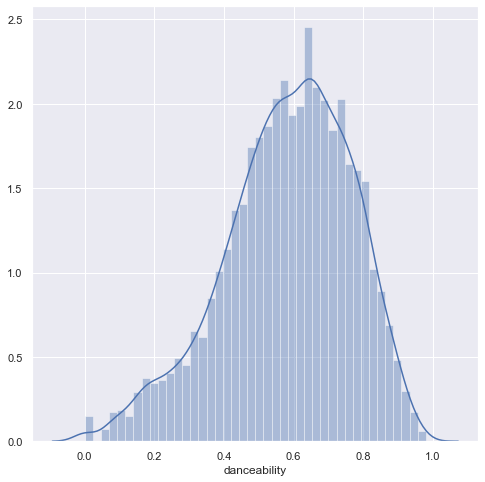

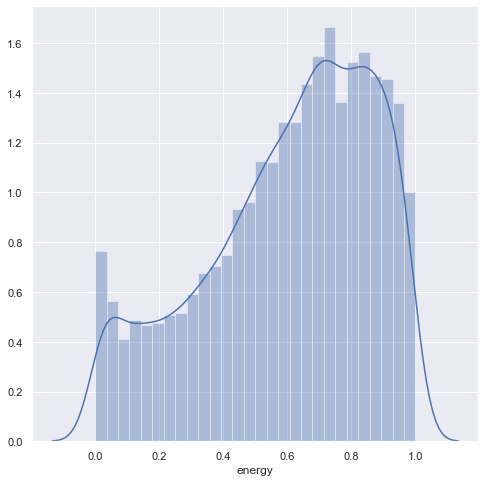

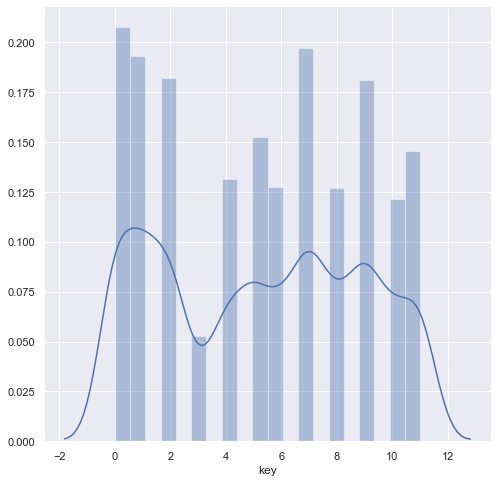

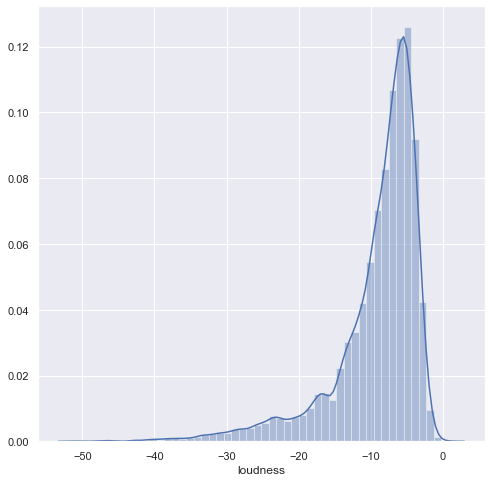

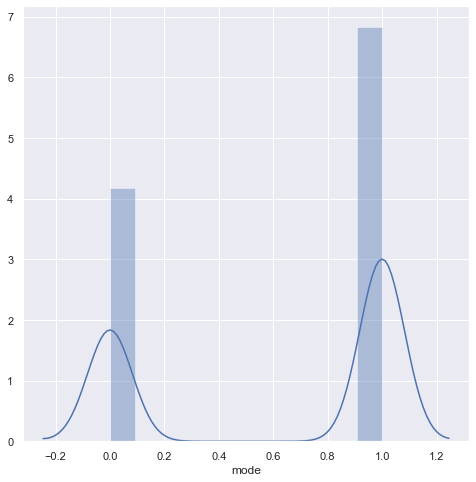

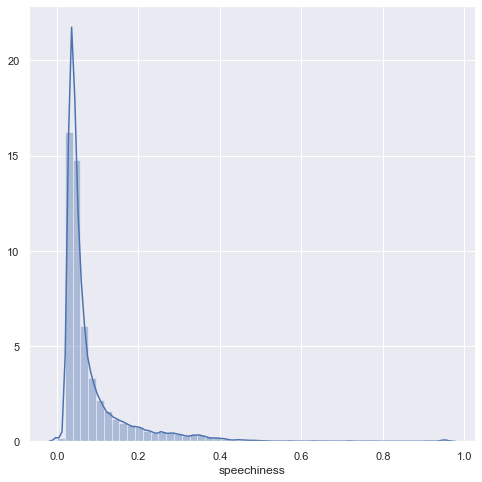

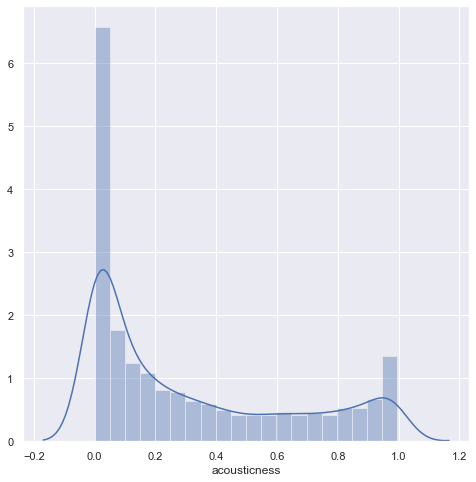

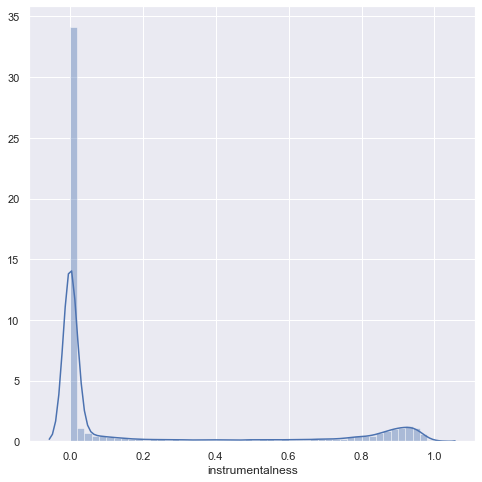

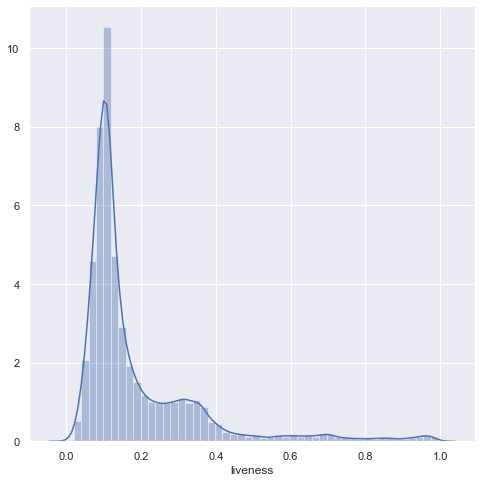

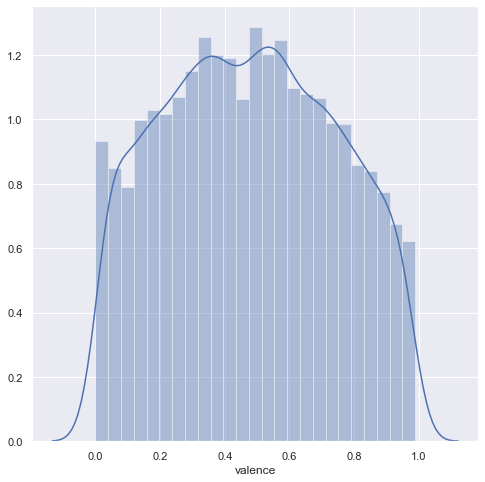

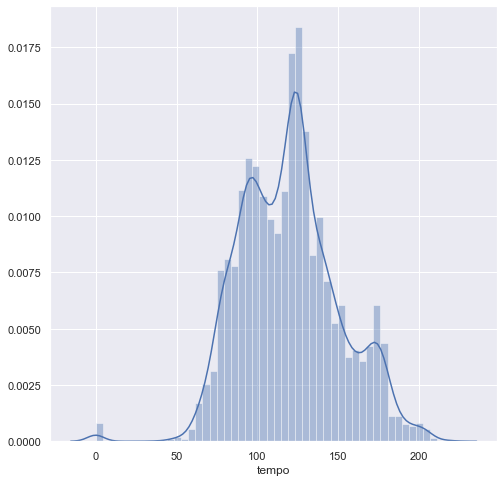

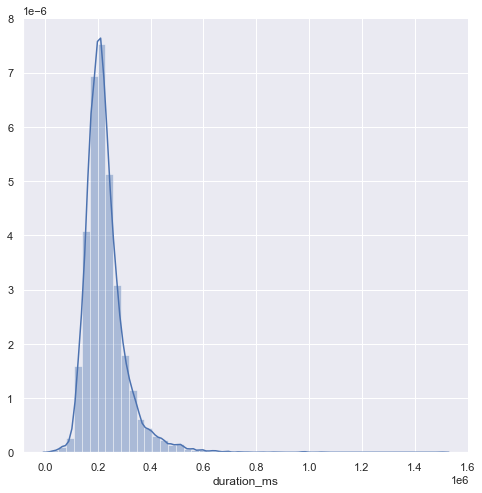

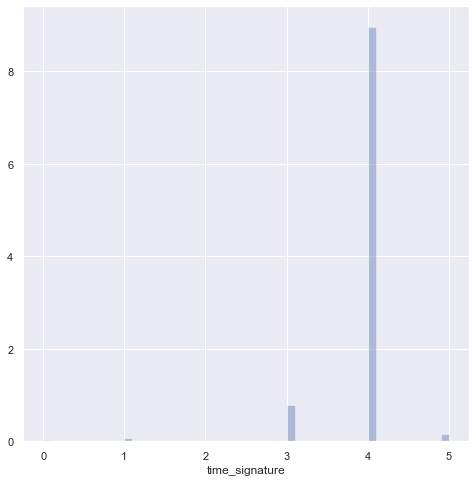

In [93]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(8,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col])
        
    plt.show()
    
df_hist(song_df_numeric)

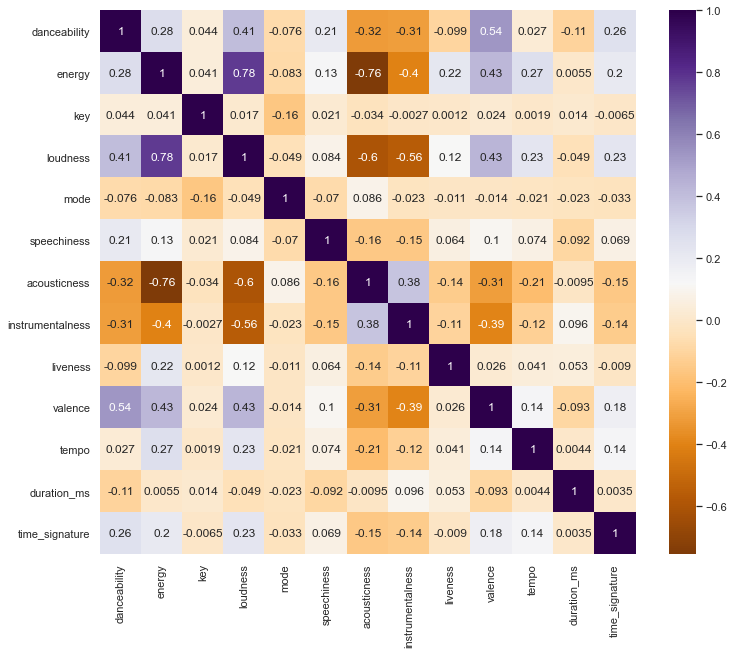

In [94]:
corr = song_df_numeric.corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            ax=ax,
            cmap='PuOr'
           )

In [97]:
X=song_df_numeric

In [98]:
X_prep=StandardScaler().fit_transform(X)

In [99]:
df_cluster=pd.DataFrame(X_prep)

In [101]:
kmeans=KMeans(n_clusters=10,random_state=18)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=18)

In [102]:
kmeans.inertia_

64900.62188595939

In [103]:
clusters=kmeans.predict(X_prep)

In [104]:
pd.DataFrame(pd.Series(clusters).value_counts().sort_index(),columns=['count'])

,count
0,612
1,2098
2,960
3,1270
4,479
5,352
6,98
7,1301
8,738
9,1835


In [105]:
X_df=pd.DataFrame(X)
X_df['cluster']=clusters

In [106]:
X_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.652,0.3830,2.0,-7.076,0.0,0.0516,0.06760,0.000000,0.0828,0.5490,145.765,178994.0,4.0,9
1,0.736,0.8020,0.0,-4.759,1.0,0.0864,0.46800,0.000000,0.0940,0.6750,144.005,172325.0,4.0,1
2,0.889,0.3400,11.0,-7.773,0.0,0.0697,0.21800,0.130000,0.0550,0.7160,94.009,174321.0,4.0,9
3,0.702,0.8250,6.0,-3.787,0.0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064.0,4.0,9
4,0.731,0.5730,4.0,-10.059,0.0,0.0544,0.40100,0.000052,0.1130,0.1450,109.928,205090.0,4.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,0.485,0.1350,6.0,-18.958,0.0,0.0357,0.99100,0.907000,0.1720,0.2100,117.079,116743.0,3.0,2
50,0.548,0.0955,1.0,-22.531,1.0,0.0368,0.74100,0.930000,0.1120,0.0594,129.332,313027.0,4.0,2
51,0.553,0.3540,0.0,-15.213,1.0,0.0433,0.75700,0.881000,0.1120,0.6820,79.314,431787.0,3.0,5
52,0.449,0.3600,7.0,-17.882,1.0,0.2100,0.99200,0.888000,0.1570,0.1930,78.916,207440.0,3.0,2


In [107]:
df_songs_clusters=pd.concat([song_df_cat,X_df],axis=1)

In [108]:
df_songs_clusters

,name,artists,type,id,uri,track_href,analysis_url,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Monster (Shawn Mendes & Justin Bieber),"Shawn Mendes, Justin Bieber",audio_features,2Z8yfpFX0ZMavHkcIeHiO1,spotify:track:2Z8yfpFX0ZMavHkcIeHiO1,https://api.spotify.com/v1/tracks/2Z8yfpFX0ZMa...,https://api.spotify.com/v1/audio-analysis/2Z8y...,0.652,0.3830,2.0,...,0.0,0.0516,0.06760,0.000000,0.0828,0.5490,145.765,178994.0,4.0,9
1,positions,Ariana Grande,audio_features,7igeByaBM0MgGsgXtNxDJ7,spotify:track:7igeByaBM0MgGsgXtNxDJ7,https://api.spotify.com/v1/tracks/7igeByaBM0Mg...,https://api.spotify.com/v1/audio-analysis/7ige...,0.736,0.8020,0.0,...,1.0,0.0864,0.46800,0.000000,0.0940,0.6750,144.005,172325.0,4.0,1
2,Therefore I Am,Billie Eilish,audio_features,54bFM56PmE4YLRnqpW6Tha,spotify:track:54bFM56PmE4YLRnqpW6Tha,https://api.spotify.com/v1/tracks/54bFM56PmE4Y...,https://api.spotify.com/v1/audio-analysis/54bF...,0.889,0.3400,11.0,...,0.0,0.0697,0.21800,0.130000,0.0550,0.7160,94.009,174321.0,4.0,9
3,Levitating (feat. DaBaby),"Dua Lipa, DaBaby",audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,0.702,0.8250,6.0,...,0.0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064.0,4.0,9
4,Dakiti,"Bad Bunny, Jhay Cortez",audio_features,47EiUVwUp4C9fGccaPuUCS,spotify:track:47EiUVwUp4C9fGccaPuUCS,https://api.spotify.com/v1/tracks/47EiUVwUp4C9...,https://api.spotify.com/v1/audio-analysis/47Ei...,0.731,0.5730,4.0,...,0.0,0.0544,0.40100,0.000052,0.1130,0.1450,109.928,205090.0,4.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,"Nocturne No. 20 in C-sharp minor, Op. posthume","Frédéric Chopin, Jacques Loussier",audio_features,7btkqjF0Jw2DopaH6wvgvD,spotify:track:7btkqjF0Jw2DopaH6wvgvD,https://api.spotify.com/v1/tracks/7btkqjF0Jw2D...,https://api.spotify.com/v1/audio-analysis/7btk...,0.485,0.1350,6.0,...,0.0,0.0357,0.99100,0.907000,0.1720,0.2100,117.079,116743.0,3.0,2
50,"Beethoven's Piano Sonata No. 8, Pathetique",Hiromi,audio_features,7hdbfMdjsdclkZONmT7lD6,spotify:track:7hdbfMdjsdclkZONmT7lD6,https://api.spotify.com/v1/tracks/7hdbfMdjsdcl...,https://api.spotify.com/v1/audio-analysis/7hdb...,0.548,0.0955,1.0,...,1.0,0.0368,0.74100,0.930000,0.1120,0.0594,129.332,313027.0,4.0,2
51,Boléro,Trio X of Sweden,audio_features,0okBlGJdxmDos1f6H4PyRq,spotify:track:0okBlGJdxmDos1f6H4PyRq,https://api.spotify.com/v1/tracks/0okBlGJdxmDo...,https://api.spotify.com/v1/audio-analysis/0okB...,0.553,0.3540,0.0,...,1.0,0.0433,0.75700,0.881000,0.1120,0.6820,79.314,431787.0,3.0,5
52,First Gymnopedie,Yusef Lateef,audio_features,6A5DjTiYSkelNb2QuEV4vt,spotify:track:6A5DjTiYSkelNb2QuEV4vt,https://api.spotify.com/v1/tracks/6A5DjTiYSkel...,https://api.spotify.com/v1/audio-analysis/6A5D...,0.449,0.3600,7.0,...,1.0,0.2100,0.99200,0.888000,0.1570,0.1930,78.916,207440.0,3.0,2


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

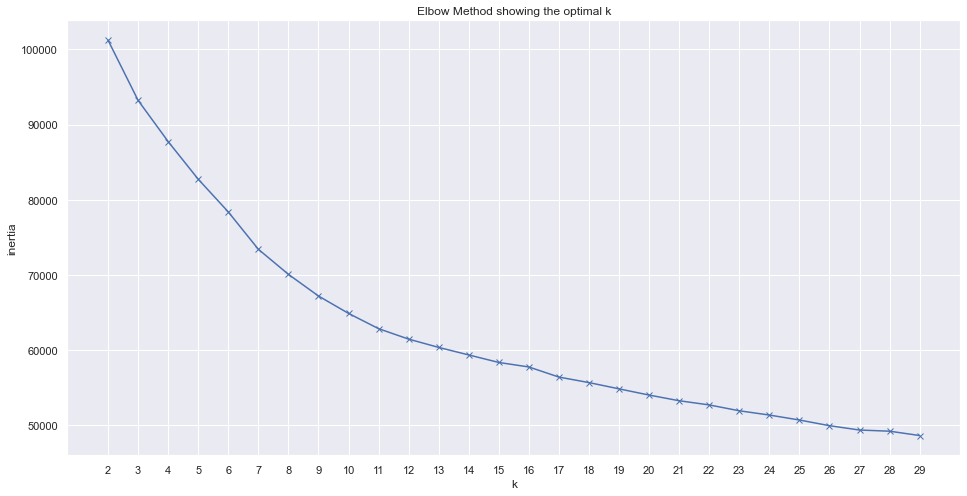

In [109]:
K = range(2, 30)
inertia = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=17)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

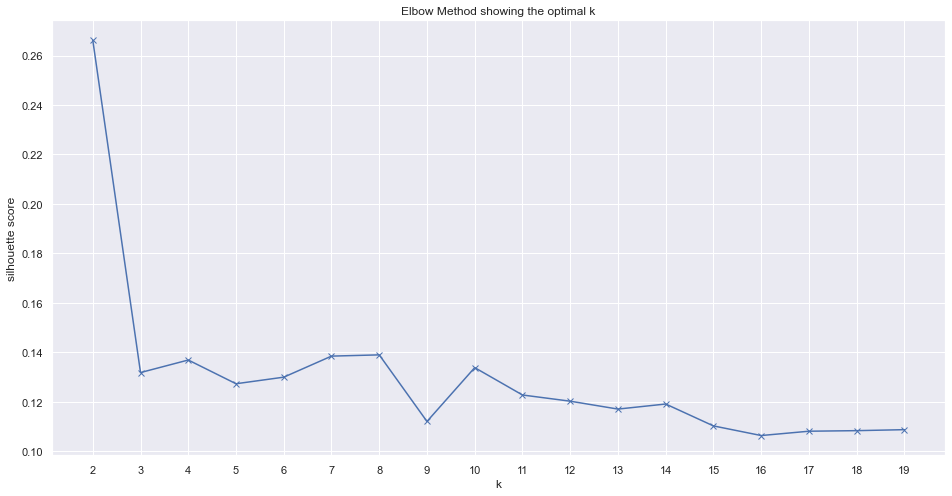

In [110]:
K = range(2, 20)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep,
                                       kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal n_init')

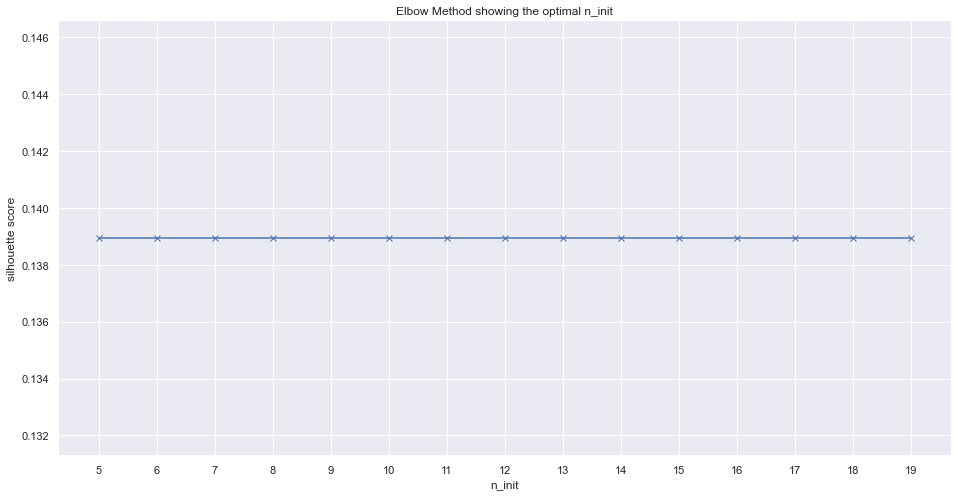

In [111]:
N_init = range(5, 20)
silhouette = []

for n in tqdm(N_init):
    kmeans = KMeans(n_clusters=8,
                    random_state=1234,
                   n_init=n)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep,
                                       kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(N_init, silhouette, 'bx-')
plt.xlabel('n_init')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(N_init), max(N_init)+1, 1.0))
plt.title('Elbow Method showing the optimal n_init')

In [112]:
def predict_cluster(model, song):
    """
    model: a trained sklearn kmeans model
    song: dict of artist & title, like {'artist':<artist>, 'title':<title>}
    """

def get_song_id(title):
    
    query1 = f"track:{title}"

    song_id = sp.search(q=query1, type="track", limit=1)['tracks']['items'][0]['id']
    return song_id

def get_features_from_id(id_, as_df=False):
    if as_df:
        return pd.DataFrame(sp.audio_features(id_))
    else:
        return sp.audio_features(id_)

In [113]:
get_features_from_id(get_song_id('Firestorm'),as_df=True)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.629,0.73,1,-4.341,0,0.0353,0.148,0.00001,0.0943,0.232,140.053,audio_features,6xzUW6hrUQIrvKmzaXf0Jx,spotify:track:6xzUW6hrUQIrvKmzaXf0Jx,https://api.spotify.com/v1/tracks/6xzUW6hrUQIr...,https://api.spotify.com/v1/audio-analysis/6xzU...,207470,4
